# UE 803: Data Science
Project: Clustering and Classifying People based on Text and
KB information

About this project
In this project, you will collect information about a people belonging to different categories (such as artists, politician, sportspeople, etc.). Based on this information, you will then try to automatically cluster and classify these people into the correct categories.
We will use two sources of information, namely:

• The Wikipedia online encyclopedia1

• The Wikidata knowledge base2

Deadline

The deadline for submission is May 15th, 2021. This is a strict deadline. Late submissions will be penalised (-0.20 points per day past the deadline).

# Exercise 1 – Corpus extraction (10 points)

The goal of this exercise is to compile a text corpus from the Wikipedia online encyclopedia. This corpus will be made of plain text sentences, selected so as to have a roughly balanced corpus in terms of train-
ing data (each target category should be associated with the same number of sentences). We will focus on the 6 following categories: architects, mathematicians, painters, politicians, singers and writers.
    
Concretely, you are required to implement a Python program which takes as a an input:

• a number k of persons per category,

• a number n of sentences per person (persons whose wikipedia description is too short to have n sentences, should be ignored).

This extraction task can be realised through the following steps:
    
1.(lecture 6) Create a list of persons you want to work with. Those persons should fall into two main types: artists (A) and non artists (Z). Singers, writers and painters are of type A while architects, politi- cians and mathematicians of type Z. For each category, select 30 persons of that category. So in total you should have a list of 180 persons (half of them are artists and half of them are not).

    You can use the wikidata warehouse to find persons of the ex- pected categories. More precisely, the Wikidata collection can be filtered out using the SPARQL language and the following end- point: https://query.wikidata.org/.

    You can thus use the SPARQLwrapper python library to apply a SPARQL query to the Wikidata warehouse and retrieve the re- quired item identifiers.

- Mapping the occupation to ID

This Part is Useless, I just map the ID to occupation. Not affect other block code.

In [3]:

# architects (Q42973)
# mathematician (Q170790)
# painter (Q1028181)
# politician (Q82955)
# singer (Q177220)
# writer (Q36180)


Extract all the data (180 persons and 30 in each categories)


Here is the concept that I extract the data:

SELECT person and personLabel WHERE

{
    
    TYPE A
    
    UNION 
    
    TYPE Z
}

The concept of whole script:

SELECT person and personLabel WHERE

{
    
    {
        SELECT person and personLabel WHERE
        {
            {singers}
            
            UNION 
            
            {writers}
            
            UNION 
            
            {painters}
        }
    }
    
    UNION 
    
    {
        SELECT person and personLabel WHERE
        {
            {architects}
            
            UNION 
            
            {mathematicians}
            
            UNION 
            
            {politicians}
        }
    }
}

In [1]:
#-----Run This
# pip install sparqlwrapper
# https://rdflib.github.io/sparqlwrapper/
#------To get 180 in final, I need to guery 60 from each categories and then eliminate later
import sys
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

query = """SELECT ?person ?personLabel WHERE
{
# type A
  {
    SELECT ?person ?personLabel WHERE
    {
         #singers
        {SELECT ?person ?personLabel
        WHERE
        {
        # ?person  occupation 'singers'
        ?person wdt:P106 wd:Q177220.
        SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
        }
        limit 60
    }
    
    UNION
    
    {
        #writers
        SELECT ?person ?personLabel
        WHERE
        {
        # ?person  occupation writers
        ?person wdt:P106 wd:Q36180.
        SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
        }
        limit 60
    }
  
    UNION
  
    {
        #painters
        SELECT ?person ?personLabel
        WHERE
        {
        #?person  occupation painters
        ?person wdt:P106 wd:Q1028181.
        SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
         }
        limit 60
        }
    }
  }
  UNION 
  
# type Z
  {
    SELECT ?person ?personLabel WHERE
    {
         #architects
        {SELECT ?person ?personLabel
        WHERE
        {
        # ?person  occupation 'architects'
        ?person wdt:P106 wd:Q42973.
        SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
        }
        limit 60
    }
    
    UNION
    
    {
        #mathematicians
        SELECT ?person ?personLabel
        WHERE
        {
        # ?person  occupation mathematicians
        ?person wdt:P106 wd:Q170790.
        SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
        }
        limit 60
    }
  
    UNION
  
    {
        #politicians
        SELECT ?person ?personLabel
        WHERE
        {
        #?person  occupation politicians
        ?person wdt:P106 wd:Q82955.
        SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
         }
        limit 60
        }
    }
  }
  
}


"""


def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    # TODO adjust user agent; see https://w.wiki/CX6
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()



results = get_results(endpoint_url, query)
# lis = []
for result in results["results"]["bindings"]:
    print(result)
#     lis.extend(result)
# len(lis)/2

{'person': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q1511'}, 'personLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Richard Wagner'}}
{'person': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q1500'}, 'personLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'José Rizal'}}
{'person': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q1488'}, 'personLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Robert Brasillach'}}
{'person': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q1430'}, 'personLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Marcus Aurelius'}}
{'person': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q1411'}, 'personLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Claudius'}}
{'person': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q1403'}, 'personLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Luigi Pirandello'}}
{'person': {'type': 'uri', 'value': 'http://www.wikidata

In [2]:
#-----Run This
#-----get the links of each persons i.e: 'http://www.wikidata.org/entity/Q2680'
list_of_wikibases = []
for result in results["results"]["bindings"]:
    list_of_wikibases.append(result['person']['value'])
    
len(list_of_wikibases)
# list_of_wikibases

360

In [3]:
#-----Run This
#-----get only the wikibase for search
# get the id "Q2680" after "http://www.wikidata.org/entity/" of the full link 'http://www.wikidata.org/entity/Q2680'
import re

wikibase_list = []

for l in list_of_wikibases:
    x = re.findall("[^http://www.wikidata.org/entity/].*", l) 
    wikibase_list.extend(x)
#     print(x)
len(wikibase_list)
# wikibase_list

360

2.(lecture 3) for each selected person, retrieve his.her Wikidata description and Wikipedia page title. This can be done using the wikidata API along with the wptools python library.

In [4]:
#-----Run This

import wptools

page_descriptions = []
add_descriptions_list = []
page_titles= []
add_titles_list = []
for wikibase in wikibase_list:
    try: 
        page = wptools.page(wikibase=wikibase)
        page.get_wikidata()
        #-----collect list of descriptions
        page_descriptions.append(page.data['description'])
        page_descriptions_copy = page_descriptions.copy()
        add_descriptions_list.append(page_descriptions_copy)
        page_descriptions[100:]

        #-----collect list of titles
    #     page.data['title']
        page_titles.append(page.data['title']) # add one title name to page_titles list
        page_titles_copy = page_titles.copy() # copy the page_titles list
        add_titles_list.append(page_titles_copy) # add selected title to another list called add_titles_list 
        page_titles[100:] # truncate all the data in page_titles list
    
    except LookupError  as le:
        pass



www.wikidata.org (wikidata) Q1511
www.wikidata.org (labels) P25|Q279272|Q51955019|P4114|P6379|P691|...
www.wikidata.org (labels) P1220|P6925|Q563340|P1266|P8179|P2031|P...
www.wikidata.org (labels) P8899|P3913|P8094|P7704|P53|P3762|Q1526...
www.wikidata.org (labels) P271|P734|P20|P268|P6844|P8750|P8234|P2...
www.wikidata.org (labels) P8551|P4200|Q9730|P3417|P7827|P8496|P19...
www.wikidata.org (labels) P373|P3106|Q5|Q94804421|P735|P2163|Q417...
www.wikidata.org (labels) P827|P4491|P2604|P859|P7859|P3280|P7026...
en.wikipedia.org (imageinfo) File:RichardWagner.jpg
Richard Wagner (en) data
{
  aliases: <list(2)> Wilhelm Richard Wagner, Wagner
  claims: <dict(258)> P827, P109, P101, P106, P373, P244, P214, P2...
  description: German composer and conductor
  image: <list(1)> {'file': 'File:RichardWagner.jpg', 'kind': 'wik...
  label: Richard Wagner
  labels: <dict(338)> P25, Q279272, Q51955019, P4114, P6379, P691,...
  modified: <dict(1)> wikidata
  requests: <list(9)> wikidata, labels, la

www.wikidata.org (labels) P1343|P1977|P1207|P5019|Q822146|P1005|P...
en.wikipedia.org (imageinfo) File:Francesco Petrarch by Justo de ...
Petrarch (en) data
{
  aliases: <list(4)> Francesco Petrarca, Peetrarque, Petrarque, Fr...
  claims: <dict(232)> P69, P373, P214, P213, P106, P434, P244, P22...
  description: Italian scholar and poet
  image: <list(1)> {'file': 'File:Francesco Petrarch by Justo de G...
  label: Petrarch
  labels: <dict(275)> Q51955019, P950, Q333634, P1066, Q731126, P4...
  modified: <dict(1)> wikidata
  requests: <list(8)> wikidata, labels, labels, labels, labels, la...
  title: Petrarch
  what: human
  wikibase: Q1401
  wikidata: <dict(231)> educated at (P69), Commons category (P373)...
  wikidata_pageid: 1823
  wikidata_url: https://www.wikidata.org/wiki/Q1401
}
www.wikidata.org (wikidata) Q1399
www.wikidata.org (labels) Q51955019|P950|Q333634|P3846|P3154|P544...
www.wikidata.org (labels) P1017|P3630|P6677|P5008|P3762|P5613|P12...
www.wikidata.org (labels) Q15994

www.wikidata.org (labels) P5466|Q51955019|P950|P463|P4114|P1066|Q...
www.wikidata.org (labels) P8034|P22|P345|P2163|P135|P3435|P7369|Q...
www.wikidata.org (labels) P1430|Q90|Q3181656|P26|P1580|Q16011749|...
www.wikidata.org (labels) P409|Q1495114|Q867541|Q71887839|P1273|P...
www.wikidata.org (labels) P7865|P5504|Q63284758|P8902|P947|P3241|...
www.wikidata.org (labels) P7902|P1695|P8849|P31|P1263|P6873|Q9734...
en.wikipedia.org (imageinfo) File:Berlioz Petit BNF Gallica-crop.jpg
Hector Berlioz (en) data
{
  aliases: <list(1)> Louis Hector Berlioz
  claims: <dict(205)> P827, P213, P27, P19, P106, P119, P20, P373,...
  description: French Romantic composer
  image: <list(1)> {'file': 'File:Berlioz Petit BNF Gallica-crop.j...
  label: Hector Berlioz
  labels: <dict(268)> P5466, Q51955019, P950, P463, P4114, P1066, ...
  modified: <dict(1)> wikidata
  requests: <list(8)> wikidata, labels, labels, labels, labels, la...
  title: Hector_Berlioz
  what: human
  wikibase: Q1151
  wikidata: <dict

www.wikidata.org (labels) P1266|P5491|P9223|P8179|P2031|Q49757|P2...
www.wikidata.org (labels) P26|P1580|Q1930187|P7763|Q49542|P742|P7...
www.wikidata.org (labels) P1438|P1207|P5019|P1890|P1424|P140|P639...
www.wikidata.org (labels) Q11774202|P7029|Q4263804|Q28790325|P729...
www.wikidata.org (labels) P1296|Q36695874|Q223688|Q5460604|P69|P3...
www.wikidata.org (labels) P947|P5905|P1185|Q15833960|Q1161171|P19...
en.wikipedia.org (imageinfo) File:Vasily Perov - Портрет Ф.М.Дост...
Fyodor Dostoevsky (en) data
{
  aliases: <list(4)> Dostoievski, Fyodor Dostoievski, Fyodor Mikha...
  claims: <dict(243)> P1315, P18, P19, P20, P106, P109, P69, P119,...
  description: Russian author
  image: <list(1)> {'file': 'File:Vasily Perov - Портрет Ф.М.Досто...
  label: Fyodor Dostoyevsky
  labels: <dict(318)> P25, Q692, P7874, P7028, P691, P5390, P1670,...
  modified: <dict(1)> wikidata
  requests: <list(9)> wikidata, labels, labels, labels, labels, la...
  title: Fyodor_Dostoevsky
  what: human
  wikib

en.wikipedia.org (imageinfo) File:Jorge Luis Borges 1951, by Gret...
Jorge Luis Borges (en) data
{
  aliases: <list(8)> Jorge Francisco Isidoro Luis Borges, Chorche ...
  claims: <dict(196)> P103, P106, P25, P119, P214, P268, P227, P26...
  description: <str(71)> Argentine short story writer, essayist, p...
  image: <list(1)> {'file': 'File:Jorge Luis Borges 1951, by Grete...
  label: Jorge Luis Borges
  labels: <dict(282)> P1950, P25, Q6882, P7666, P7433, Q71, P1289,...
  modified: <dict(1)> wikidata
  requests: <list(8)> wikidata, labels, labels, labels, labels, la...
  title: Jorge_Luis_Borges
  what: human
  wikibase: Q909
  wikidata: <dict(196)> native language (P103), occupation (P106),...
  wikidata_pageid: 1232
  wikidata_url: https://www.wikidata.org/wiki/Q909
}
www.wikidata.org (wikidata) Q905
www.wikidata.org (labels) P25|Q1462513|Q51955019|P7874|P6379|P691...
www.wikidata.org (labels) P1266|P5491|Q82133|P8179|P2031|P1607|Q3...
www.wikidata.org (labels) P103|P8034|P8899|P360

www.wikidata.org (labels) Q192881|P5477|P2605|P463|Q333634|P950|P...
www.wikidata.org (labels) P9226|P839|Q37209438|P5882|P8094|P7704|...
www.wikidata.org (labels) Q6581097|P1472|P906|P1871|Q1209498|P109...
www.wikidata.org (labels) Q49757|P7859|P7026|P3280|P8385|Q637787|...
www.wikidata.org (labels) P1005|P5587|P1695|P7902|P8849|P9282|P31...
en.wikipedia.org (imageinfo) File:Pierre Corneille 2.jpg
Pierre Corneille (en) data
{
  claims: <dict(183)> P106, P119, P19, P373, P244, P214, P213, P22...
  description: French tragedian
  image: <list(1)> {'file': 'File:Pierre Corneille 2.jpg', 'kind':...
  label: Pierre Corneille
  labels: <dict(217)> Q192881, P5477, P2605, P463, Q333634, P950, ...
  modified: <dict(1)> wikidata
  requests: <list(7)> wikidata, labels, labels, labels, labels, la...
  title: Pierre_Corneille
  what: human
  wikibase: Q747
  wikidata: <dict(183)> occupation (P106), place of burial (P119),...
  wikidata_pageid: 1050
  wikidata_url: https://www.wikidata.org/wiki/Q74

www.wikidata.org (labels) P7666
en.wikipedia.org (imageinfo) File:Giuseppe Garibaldi (1866).jpg
Giuseppe Garibaldi (en) data
{
  aliases: <list(2)> Joseph-Marie Garibaldi, Garibaldi
  claims: <dict(169)> P734, P1045, P20, P21, P373, P19, P27, P214,...
  description: Italian general, patriot and republican
  image: <list(1)> {'file': 'File:Giuseppe Garibaldi (1866).jpg', ...
  label: Giuseppe Garibaldi
  labels: <dict(251)> Q920894, Q132851, Q157148, P950, Q187255, P4...
  modified: <dict(1)> wikidata
  requests: <list(8)> wikidata, labels, labels, labels, labels, la...
  title: Giuseppe_Garibaldi
  what: human
  wikibase: Q539
  wikidata: <dict(168)> family name (P734), Sycomore ID (P1045), p...
  wikidata_pageid: 798
  wikidata_url: https://www.wikidata.org/wiki/Q539
}
www.wikidata.org (wikidata) Q535
www.wikidata.org (labels) P25|Q814779|Q2599177|Q51955019|P6379|P1...
www.wikidata.org (labels) Q70495965|P949|P4619|Q209842|P245|P2600...
www.wikidata.org (labels) P2605|P3154|Q1700481|P

www.wikidata.org (labels) P2019|Q35802|P3847|P4862|Q4164507|Q5195...
www.wikidata.org (labels) Q5|P8833|P8814|Q184485|P2252|Q6625963|Q...
www.wikidata.org (labels) P119|Q3589290|Q1210539|P396|P1412|P40|Q...
www.wikidata.org (labels) P535|P5101|P7818|Q4964182|Q6581097|P914...
www.wikidata.org (labels) P7293|P9081|P4081|P5739|P8795|P6412|P90...
www.wikidata.org (labels) P8750|P1953|P4839|P910|P2533|P7753|P21|...
en.wikipedia.org (imageinfo) File:Denis Diderot - Alix - Vanloo.p...
Denis Diderot (en) data
{
  aliases: <list(1)> Diderot
  claims: <dict(229)> P345, P734, P910, P27, P19, P20, P18, P22, P...
  description: <str(62)> French Enlightenment philosopher and ency...
  image: <list(2)> {'file': 'File:Denis Diderot - Alix - Vanloo.pn...
  label: Denis Diderot
  labels: <dict(294)> P2019, Q35802, P3847, P4862, Q4164507, Q5195...
  modified: <dict(1)> wikidata
  requests: <list(8)> wikidata, labels, labels, labels, labels, la...
  title: Denis_Diderot
  what: human
  wikibase: Q448
  wi

www.wikidata.org (labels) P2019|Q37073|P3265|P2605|P9328|Q488205|...
www.wikidata.org (labels) P7704|P3630|Q32360797|Q11399|Q177220|P6...
www.wikidata.org (labels) P2949|P2600|P4342|P535|Q272208|Q8456646...
www.wikidata.org (labels) Q6607|P4208|P269|P1006|P2626|P1477|P786...
www.wikidata.org (labels) P935|Q1028181|P27|P569|P2639|P3478|Q494...
en.wikipedia.org (imageinfo) File:Serge Gainsbourg par Claude Tru...
Serge Gainsbourg (en) data
{
  aliases: <list(1)> Lucien Ginsburg
  claims: <dict(146)> P40, P119, P20, P19, P373, P214, P213, P27, ...
  description: <str(118)> French singer, songwriter, pianist, film...
  image: <list(1)> {'file': 'File:Serge Gainsbourg par Claude Truo...
  label: Serge Gainsbourg
  labels: <dict(208)> P2019, Q37073, P3265, P2605, P9328, Q488205,...
  modified: <dict(1)> wikidata
  requests: <list(7)> wikidata, labels, labels, labels, labels, la...
  title: Serge_Gainsbourg
  what: human
  wikibase: Q1698
  wikidata: <dict(146)> child (P40), place of burial (P

www.wikidata.org (labels) Q117012|P25|Q384664|P3341|Q488205|P6379...
www.wikidata.org (labels) P1415|P1220|P6925|P3142|P1266|P3544|Q17...
www.wikidata.org (labels) P1015|P349|P7929|Q149086|P8971|P3029|P3...
www.wikidata.org (labels) Q460889|P6874|Q357974|P1889|P6698|P157|...
www.wikidata.org (labels) P1003|P8814|P1368|P2168|P22|P7369|Q3618...
www.wikidata.org (labels) P2626|P1477|P6839|P8870|P3065|Q1860|P34...
www.wikidata.org (labels) P3630|P5287|Q177220|Q12144794|P1296|P69...
www.wikidata.org (labels) Q6607|Q60135106|P8902|P8687|P7865|P5504...
en.wikipedia.org (imageinfo) File:John Lennon portrait.jpg
John Lennon (en) data
{
  aliases: <list(4)> John Winston Ono Lennon, John Winston Lennon,...
  claims: <dict(279)> P26, P40, P227, P214, P25, P22, P106, P109, ...
  description: <str(73)> English singer and songwriter, founding m...
  image: <list(1)> {'file': 'File:John Lennon portrait.jpg', 'kind...
  label: John Lennon
  labels: <dict(377)> Q117012, P25, Q384664, P3341, Q488205, P63

www.wikidata.org (labels) P2019|P25|Q54365|P3265|P2605|P9328|Q488...
www.wikidata.org (labels) Q935843|P4527|P5882|P8094|P7109|Q620817...
www.wikidata.org (labels) P1375|P4619|P136|P2397|Q9794|P5063|P294...
www.wikidata.org (labels) Q6771790|P140|Q310796|P7194|P6517|Q6607...
www.wikidata.org (labels) P5587|P1695|Q179829|P31|P1263|P264|P141...
en.wikipedia.org (imageinfo) File:Bob-Marley.jpg
Bob Marley (en) data
{
  aliases: <list(7)> Donald Marley, Nesta Robert Marley, Tuff Gong...
  claims: <dict(159)> P734, P910, P27, P19, P20, P18, P214, P269, ...
  description: Jamaican singer, songwriter and musician
  image: <list(1)> {'file': 'File:Bob-Marley.jpg', 'kind': 'wikida...
  label: Bob Marley
  labels: <dict(217)> P2019, P25, Q54365, P3265, P2605, P9328, Q48...
  modified: <dict(1)> wikidata
  requests: <list(7)> wikidata, labels, labels, labels, labels, la...
  title: Bob_Marley
  what: human
  wikibase: Q409
  wikidata: <dict(159)> family name (P734), topic's main category ...
  wik

www.wikidata.org (labels) P25|Q413|Q4164507|Q51955019|Q260514|P41...
www.wikidata.org (labels) P1871|Q1234713|Q3391743|Q40348|Q8178443...
www.wikidata.org (labels) P3154|Q1700481|P648|P8290|P1015|P1938|P...
www.wikidata.org (labels) Q10855195|Q99413897|P9459|P2397|P2949|Q...
www.wikidata.org (labels) P8234|Q1069|P21|P5859|P3997|P3987|Q1350...
www.wikidata.org (labels) P7039|Q1298242|P4581|P5641|P8861|Q36955...
www.wikidata.org (labels) Q1585819|P8870|P3065|Q1534158|Q590208|Q...
www.wikidata.org (labels) Q41726|P512|P5613|P1296|Q207741|Q546060...
www.wikidata.org (labels) P4081|P5739|Q67311526|Q13416354|Q111658...
en.wikipedia.org (imageinfo) File:Goethe (Stieler 1828).jpg
Johann Wolfgang von Goethe (en) data
{
  aliases: <list(6)> Johann Wolfgang Von Goethe, Goethe, goethe, j...
  claims: <dict(315)> P345, P650, P745, P640, P19, P21, P373, P214...
  description: <str(67)> German writer, artist, natural scientist ...
  image: <list(1)> {'file': 'File:Goethe (Stieler 1828).jpg', 'kin...


www.wikidata.org (labels) P2011|P1258|P8406|Q18563658|Q64214265|P...
www.wikidata.org (labels) P6698|P4293|Q913672|P4432|Q679527|P9251...
www.wikidata.org (labels) Q1952944|P7848|Q238587|P5008|P4145|P322...
www.wikidata.org (labels) P1977|P1695|P4663|Q1028181|Q1342|Q23930...
www.wikidata.org (labels) Q1928672|P7699|Q18814623|P535|Q19329824...
en.wikipedia.org (imageinfo) File:Andy Warhol 1977.jpg|File:Andy ...
Andy Warhol (en) data
{
  aliases: <list(5)> Andrew Warhola, Andrew Warhol, Drella, Andrej...
  claims: <dict(227)> P800, P650, P27, P373, P214, P244, P213, P19...
  description: American artist and film director and producer (192...
  image: <list(2)> {'file': 'File:Andy Warhol 1977.jpg', 'kind': '...
  label: Andy Warhol
  labels: <dict(350)> P25, P8783, Q2338135, P6379, P691, P1670, P9...
  modified: <dict(1)> wikidata
  requests: <list(9)> wikidata, labels, labels, labels, labels, la...
  title: Andy_Warhol
  what: human
  wikibase: Q5603
  wikidata: <dict(227)> notable work 

www.wikidata.org (labels) P4145|P3222|P1882|Q567861|P1315|P2843|P...
www.wikidata.org (labels) P3430|P8982|P2538|P3348|P7466|Q2627551|...
www.wikidata.org (labels) Q641|P109|P723|Q180788|Q2438217|Q391140...
www.wikidata.org (labels) P1417|P935|P569|P4553
en.wikipedia.org (imageinfo) File:Michelangelo Daniele da Volterr...
Michelangelo (en) data
{
  aliases: <list(170)> Michelangelo Bonorotti, Michael Angelo Buon...
  claims: <dict(240)> P1066, P18, P106, P135, P19, P20, P119, P27,...
  description: Italian sculptor, painter, architect and poet (1475...
  image: <list(1)> {'file': 'File:Michelangelo Daniele da Volterra...
  label: Michelangelo
  labels: <dict(354)> Q51955019, P8783, P6379, P691, Q1624722, Q19...
  modified: <dict(1)> wikidata
  requests: <list(10)> wikidata, labels, labels, labels, labels, l...
  title: Michelangelo
  what: human
  wikibase: Q5592
  wikidata: <dict(240)> student of (P1066), image (P18), occupatio...
  wikidata_pageid: 6638
  wikidata_url: https://www.wi

www.wikidata.org (labels) P25|Q13365770|Q52101|Q51955019|Q1129820...
www.wikidata.org (labels) P6002|Q73462|Q1735|P5421|P1871|Q671384|...
www.wikidata.org (labels) P7666|Q2766547|Q1157807|P3154|Q1700481|...
www.wikidata.org (labels) P26|P1580|Q1760539|P7425|P1299|Q2970522...
www.wikidata.org (labels) P271|P3241|Q21567927|P734|Q365|P650|Q99...
www.wikidata.org (labels) P22|P7369|P8748|Q169542|P7848|Q1505892|...
www.wikidata.org (labels) P4399|Q3783572|Q4114391|P2041|P269|Q489...
www.wikidata.org (labels) P3630|Q42884|P1296|Q700959|Q5460604|Q26...
www.wikidata.org (labels) Q67311526|P4491|Q2628596|P859|P1367|P78...
en.wikipedia.org (imageinfo) File:Albrecht Dürer - 1500 self-port...
Albrecht Dürer (en) data
{
  aliases: <list(107)> Dürer, Albert Duur, Albrecht Türer, Albrech...
  claims: <dict(253)> P22, P19, P18, P119, P227, P244, P214, P373,...
  description: German painter, printmaker, mathematician, and theorist
  image: <list(2)> {'file': 'File:Selbstporträt, by Albrecht Dürer...
  

www.wikidata.org (labels) Q668411|P793|P463|P1066|P6379|P2042|P83...
www.wikidata.org (labels) Q576434|P136|P245|Q742333|Q602358|P535|...
www.wikidata.org (labels) Q2959137|Q579808|P4927|P21|P3219|P227|Q...
en.wikipedia.org (imageinfo) File:Picot, François Edouard.jpg|Fil...
François-Édouard Picot (en) data
{
  aliases: <list(6)> François-Edouard Picot, Francois Eduard Picot...
  claims: <dict(68)> P19, P373, P214, P213, P227, P20, P268, P269,...
  description: French painter (1786-1868)
  image: <list(2)> {'file': 'File:François-Edouard Picot BNF Galli...
  label: François-Édouard Picot
  labels: <dict(119)> Q668411, P793, P463, P1066, P6379, P2042, P8...
  modified: <dict(1)> wikidata
  requests: <list(5)> wikidata, labels, labels, labels, imageinfo
  title: François-Édouard_Picot
  what: human
  wikibase: Q5233
  wikidata: <dict(68)> place of birth (P19), Commons category (P37...
  wikidata_pageid: 6166
  wikidata_url: https://www.wikidata.org/wiki/Q5233
}
www.wikidata.org (wikidata

www.wikidata.org (labels) Q18327304|P7704|Q6581097|P1006|P19|P856...
en.wikipedia.org (imageinfo) File:Rosearik Rikki Simons 2014.jpg
Rosearik Rikki Simons (en) data
{
  aliases: <list(2)> Rikki Simons, Rosearik Rikki Simmons
  claims: <dict(24)> P214, P213, P21, P106, P569, P31, P19, P856, ...
  description: American voice actor, writer, graphic novelist, and...
  image: <list(1)> {'file': 'File:Rosearik Rikki Simons 2014.jpg',...
  label: Rosearik Rikki Simons
  labels: <dict(38)> Q18327304, P7704, Q6581097, P1006, P19, P856,...
  modified: <dict(1)> wikidata
  requests: <list(3)> wikidata, labels, imageinfo
  title: Rosearik_Rikki_Simons
  what: human
  wikibase: Q4025
  wikidata: <dict(24)> VIAF ID (P214), ISNI (P213), sex or gender ...
  wikidata_pageid: 4940
  wikidata_url: https://www.wikidata.org/wiki/Q4025
}
www.wikidata.org (wikidata) Q3824
www.wikidata.org (labels) Q602358|P7848|P5466|Q272208|P269|Q65810...
www.wikidata.org (labels) Q90|P227|Q5|P244|P1343|P213|Q10855271|Q...

www.wikidata.org (labels) P25|Q9934|P463|P950|P1066|Q11569986|P63...
www.wikidata.org (labels) P8406|Q378145|P1988|Q214867|Q5442991|Q1...
www.wikidata.org (labels) Q7468648|P245|P2949|P2600|P6002|P4342|P...
www.wikidata.org (labels) P8980|P7859|Q62091668|Q1371509|Q8315038...
www.wikidata.org (labels) P1207|Q1871689|P7445|P5019|P3901|Q10469...
en.wikipedia.org (imageinfo) File:Maurits Cornelis Escher.jpg
M. C. Escher (en) data
{
  aliases: <list(5)> Maurits Cornelis Escher, Mauricio Escher, Mau...
  claims: <dict(155)> P245, P1563, P856, P373, P214, P213, P434, P...
  description: Dutch graphic artist (1898-1972)
  image: <list(1)> {'file': 'File:Maurits Cornelis Escher.jpg', 'k...
  label: M. C. Escher
  labels: <dict(225)> P25, Q9934, P463, P950, P1066, Q11569986, P6...
  modified: <dict(1)> wikidata
  requests: <list(7)> wikidata, labels, labels, labels, labels, la...
  title: M._C._Escher
  what: human
  wikibase: Q1470
  wikidata: <dict(155)> Union List of Artist Names ID (P245), M

en.wikipedia.org (imageinfo) File:Bob Dylan in November 1963.jpg|...
Bob Dylan (en) data
{
  aliases: <list(13)> Bob Landy, Robert Milkwood Thomas, Tedham Po...
  claims: <dict(259)> P735, P27, P19, P358, P373, P106, P18, P214,...
  description: <str(97)> American recording artist, singer-songwri...
  image: <list(2)> {'file': 'File:Joan Baez Bob Dylan crop.jpg', '...
  label: Bob Dylan
  labels: <dict(366)> Q131725, P4114, P5917, P6379, P691, Q4068390...
  modified: <dict(1)> wikidata
  requests: <list(10)> wikidata, labels, labels, labels, labels, l...
  title: Bob_Dylan
  what: human
  wikibase: Q392
  wikidata: <dict(259)> given name (P735), country of citizenship ...
  wikidata_pageid: 595
  wikidata_url: https://www.wikidata.org/wiki/Q392
}
www.wikidata.org (wikidata) Q352
www.wikidata.org (labels) P25|Q2498180|Q41329|Q22084764|Q16159056...
www.wikidata.org (labels) P3509|P5421|Q1726|Q22133423|P8349|Q7610...
www.wikidata.org (labels) Q230271|Q22121817|P4515|Q83364|Q2763|Q1...
www

www.wikidata.org (labels) P2019|P25|Q5520192|Q37073|Q3371080|P946...
www.wikidata.org (labels) P8094|P7109|P7704|P2002|P3630|Q11399|Q1...
www.wikidata.org (labels) P4342|Q2358400|Q51527076|P3417|P7818|P2...
www.wikidata.org (labels) P3040|Q139427|P1344|Q211478|P5395|P269|...
www.wikidata.org (labels) P1263|P264|P6955|P1884|P1417|P935|P27|P...
en.wikipedia.org (imageinfo) File:Celine Dion Concert Singing Tak...
Celine Dion (en) data
{
  aliases: <list(3)> Céline Marie Claudette Dion, Celine Marie Cla...
  claims: <dict(157)> P227, P214, P358, P373, P106, P27, P244, P21...
  description: French Canadian singer (* 1968)
  image: <list(2)> {'file': 'File:Celine Dion Concert Singing Taki...
  label: Céline Dion
  labels: <dict(212)> P2019, P25, Q5520192, Q37073, Q3371080, P946...
  modified: <dict(1)> wikidata
  requests: <list(7)> wikidata, labels, labels, labels, labels, la...
  title: Celine_Dion
  what: human
  wikibase: Q5105
  wikidata: <dict(157)> GND ID (P227), VIAF ID (P214), disco

www.wikidata.org (labels) P7109|P7704|P2002|P4208|Q37073|P3265|P8...
www.wikidata.org (labels) P7859|P1303|Q846833
en.wikipedia.org (imageinfo) File:Stefanie Heinzmann 2009.jpg
Stefanie Heinzmann (en) data
{
  aliases: <list(1)> Stefanie Fabienne Heinzmann
  claims: <dict(39)> P19, P18, P358, P106, P434, P214, P213, P373,...
  description: Swiss soul and pop singer
  image: <list(1)> {'file': 'File:Stefanie Heinzmann 2009.jpg', 'k...
  label: Stefanie Heinzmann
  labels: <dict(53)> P7109, P7704, P2002, P4208, Q37073, P3265, P8...
  modified: <dict(1)> wikidata
  requests: <list(4)> wikidata, labels, labels, imageinfo
  title: Stefanie_Heinzmann
  what: human
  wikibase: Q4489
  wikidata: <dict(39)> place of birth (P19), image (P18), discogra...
  wikidata_pageid: 5424
  wikidata_url: https://www.wikidata.org/wiki/Q4489
}
www.wikidata.org (wikidata) Q4473
www.wikidata.org (labels) P7214|P2019|Q37073|P2605|Q488205|P950|P...
www.wikidata.org (labels) P19|P856|P646|Q21511795|P2435|P3056|Q6

www.wikidata.org (labels) P935|Q210189|P27|P569|Q18412166|Q291417...
en.wikipedia.org (imageinfo) File:Woody Guthrie.jpg
Woody Guthrie (en) data
{
  aliases: <list(2)> Woodrow Wilson Guthrie, Woodrow Wilson "Woody...
  claims: <dict(113)> P136, P358, P214, P213, P106, P373, P434, P2...
  description: American singer-songwriter and folk musician
  image: <list(1)> {'file': 'File:Woody Guthrie.jpg', 'kind': 'wik...
  label: Woody Guthrie
  labels: <dict(157)> P9328, Q488205, P950, P4823, P648, P6015, P1...
  modified: <dict(1)> wikidata
  requests: <list(6)> wikidata, labels, labels, labels, labels, im...
  title: Woody_Guthrie
  what: human
  wikibase: Q4061
  wikidata: <dict(113)> genre (P136), discography (P358), VIAF ID ...
  wikidata_pageid: 4977
  wikidata_url: https://www.wikidata.org/wiki/Q4061
}
www.wikidata.org (wikidata) Q4042
www.wikidata.org (labels) P2019|P3265|P2605|Q488205|P2850|P2013|Q...
www.wikidata.org (labels) Q49085|P7085|P6461|P19|P856|P646|Q27914...
www.wikidata.o

www.wikidata.org (labels) P2019|P2605|P9328|P950|Q13452528|P691|P...
www.wikidata.org (labels) P244|P509|P2924|P213|P742|Q3035420|P798...
www.wikidata.org (labels) P3219|Q1461176|P227|P1343|P1977|P1207|P...
en.wikipedia.org (imageinfo) File:Bourvil2.jpg
Bourvil (en) data
{
  aliases: <list(4)> André Robert Raimbourg, André Bourvil, Andre ...
  claims: <dict(91)> P20, P244, P214, P227, P213, P106, P434, P345...
  description: French actor, comedian and singer
  image: <list(1)> {'file': 'File:Bourvil2.jpg', 'kind': 'wikidata...
  label: Bourvil
  labels: <dict(115)> P2019, P2605, P9328, P950, Q13452528, P691, ...
  modified: <dict(1)> wikidata
  requests: <list(5)> wikidata, labels, labels, labels, imageinfo
  title: Bourvil
  what: human
  wikibase: Q2750
  wikidata: <dict(91)> place of death (P20), Library of Congress a...
  wikidata_pageid: 3724
  wikidata_url: https://www.wikidata.org/wiki/Q2750
}
www.wikidata.org (wikidata) Q2709
www.wikidata.org (labels) P3845|Q1624133|P2019|P3919

www.wikidata.org (labels) Q488205|P950|Q63313523|P2850|P2032|Q486...
www.wikidata.org (labels) Q553858|P1828|P737|P244|P213|Q55960555|...
www.wikidata.org (labels) P227|Q31561|Q2535085|Q171558|P1977|Q178...
en.wikipedia.org (imageinfo) File:Daniel Balavoine.jpg
Daniel Balavoine (en) data
{
  aliases: <list(1)> Daniel Xavier-Marie Balavoine
  claims: <dict(70)> P27, P19, P20, P106, P373, P214, P213, P434, ...
  description: French recording artist; singer-songwriter
  image: <list(1)> {'file': 'File:Daniel Balavoine.jpg', 'kind': '...
  label: Daniel Balavoine
  labels: <dict(115)> Q488205, P950, Q63313523, P2850, P2032, Q486...
  modified: <dict(1)> wikidata
  requests: <list(5)> wikidata, labels, labels, labels, imageinfo
  title: Daniel_Balavoine
  what: human
  wikibase: Q1802
  wikidata: <dict(70)> country of citizenship (P27), place of birt...
  wikidata_pageid: 2436
  wikidata_url: https://www.wikidata.org/wiki/Q1802
}
www.wikidata.org (wikidata) Q1790
www.wikidata.org (labels) Q

www.wikidata.org (labels) Q51955019|Q1264337|Q15056034|Q19372|P46...
www.wikidata.org (labels) P106|P69|P1280|P570|P1315|P119|P396|P40...
www.wikidata.org (labels) P2549|P8947|P3365|P8189|P108|P8153|Q184...
www.wikidata.org (labels) P1695|P31|Q14539990|P1417|P27|P569|P140|P1284
en.wikipedia.org (imageinfo) File:Luigi Einaudi.jpg
Luigi Einaudi (en) data
{
  claims: <dict(110)> P39, P106, P214, P213, P18, P227, P244, P373...
  description: 2nd President of Italy (1874-1961)
  image: <list(1)> {'file': 'File:Luigi Einaudi.jpg', 'kind': 'wik...
  label: Luigi Einaudi
  labels: <dict(158)> Q51955019, Q1264337, Q15056034, Q19372, P463...
  modified: <dict(1)> wikidata
  requests: <list(6)> wikidata, labels, labels, labels, labels, im...
  title: Luigi_Einaudi
  what: human
  wikibase: Q1242
  wikidata: <dict(110)> position held (P39), occupation (P106), VI...
  wikidata_pageid: 1615
  wikidata_url: https://www.wikidata.org/wiki/Q1242
}
www.wikidata.org (wikidata) Q1241
www.wikidata.org (labe

www.wikidata.org (labels) Q1342777|Q17409133|P1186|P443|Q22058344...
www.wikidata.org (labels) P1412|Q2634|P166|Q541679|Q43388249|Q129...
www.wikidata.org (labels) Q88821414|P5664|P2604|P1607|Q1158951|P7...
en.wikipedia.org (imageinfo) File:Presidente Napolitano.jpg
Giorgio Napolitano (en) data
{
  claims: <dict(87)> P1280, P21, P27, P19, P106, P109, P373, P39, ...
  description: 11th President of Italy
  image: <list(1)> {'file': 'File:Presidente Napolitano.jpg', 'kin...
  label: Giorgio Napolitano
  labels: <dict(143)> Q1342777, Q17409133, P1186, P443, Q22058344,...
  modified: <dict(1)> wikidata
  requests: <list(5)> wikidata, labels, labels, labels, imageinfo
  title: Giorgio_Napolitano
  what: human
  wikibase: Q1220
  wikidata: <dict(86)> CONOR.SI ID (P1280), sex or gender (P21), c...
  wikidata_pageid: 1589
  wikidata_url: https://www.wikidata.org/wiki/Q1220
}
www.wikidata.org (wikidata) Q1149
www.wikidata.org (labels) Q1575044|P25|P793|Q3798293|P2605|P950|P...
www.wikidata.org 

en.wikipedia.org (imageinfo) File:Gaius Iulius Caesar (Vatican Mu...
Julius Caesar (en) data
{
  aliases: <list(7)> Caesar, Gaius Julius Caesar IV, Gaius Iulius ...
  claims: <dict(223)> P22, P40, P26, P25, P214, P244, P268, P213, ...
  description: Roman general, statesman and final Dictator
  image: <list(1)> {'file': 'File:Gaius Iulius Caesar (Vatican Mus...
  label: Julius Caesar
  labels: <dict(323)> P25, Q97667506, Q51955019, Q232229, P6379, P...
  modified: <dict(1)> wikidata
  requests: <list(9)> wikidata, labels, labels, labels, labels, la...
  title: Julius_Caesar
  what: human
  wikibase: Q1048
  wikidata: <dict(223)> father (P22), child (P40), spouse (P26), m...
  wikidata_pageid: 1382
  wikidata_url: https://www.wikidata.org/wiki/Q1048
}
www.wikidata.org (wikidata) Q1047
www.wikidata.org (labels) P2605|P950|P463|P3342|P3154|Q1149|P3602...
www.wikidata.org (labels) Q808967|P6058|P1296|P1225|P4145|Q546060...
www.wikidata.org (labels) P7818|Q6581097|P6404|P906|P5421|P8496|P..

www.wikidata.org (labels) P25|Q16487395|P3828|Q4052523|P691|Q1518...
www.wikidata.org (labels) P1006|Q163816|P8309|Q1130019|Q4458386|P...
www.wikidata.org (labels) Q462189|Q100137722|P3762|P9426|Q9248|P4...
www.wikidata.org (labels) Q2069833|Q17378135|P9251|Q35637|P2966|P...
www.wikidata.org (labels) P1368|P2168|Q717406|P22|P7369|Q1774814|...
www.wikidata.org (labels) P269|P8992|P1477|P2188|P3065|Q79854|Q37...
www.wikidata.org (labels) P2889|Q17244894|Q1987287|Q27491113|P244...
www.wikidata.org (labels) P3221|P3219|Q59351315|P3232|Q4088132|P7...
en.wikipedia.org (imageinfo) File:JStalin Secretary general CCCP ...
Joseph Stalin (en) data
{
  aliases: <list(10)> Ioseb Besarionis dze Dzhugashvili, Stalin, J...
  claims: <dict(223)> P172, P26, P40, P25, P22, P214, P227, P244, ...
  description: <str(123)> Soviet politician, general secretary of ...
  image: <list(3)> {'file': 'File:JStalin Secretary general CCCP 1...
  label: Joseph Stalin
  labels: <dict(364)> P25, Q16487395, P3828, Q4052

www.wikidata.org (labels) P94|P1950|Q2300740|P25|P950|P3602|P648|...
www.wikidata.org (labels) Q1321|P19|P646|P5442|Q17366068|Q2086664...
en.wikipedia.org (imageinfo) File:Jorge Alessandri Rodríguez.JPG|...
Jorge Alessandri (en) data
{
  claims: <dict(54)> P535, P214, P213, P18, P109, P268, P227, P244...
  description: Chilean politician and President (1896-1986)
  image: <list(2)> {'file': 'File:Jorge Alessandri Rodríguez.JPG',...
  label: Jorge Alessandri
  labels: <dict(87)> P94, P1950, Q2300740, P25, P950, P3602, P648,...
  modified: <dict(1)> wikidata
  requests: <list(4)> wikidata, labels, labels, imageinfo
  title: Jorge_Alessandri
  what: human
  wikibase: Q576
  wikidata: <dict(54)> Find A Grave memorial ID (P535), VIAF ID (P...
  wikidata_pageid: 848
  wikidata_url: https://www.wikidata.org/wiki/Q576
}
www.wikidata.org (wikidata) Q567
www.wikidata.org (labels) P25|Q16972891|Q314532|Q4970706|Q1712283...
www.wikidata.org (labels) P8313|Q42593905|Q586|P1006|Q704641|P197...
www.w

www.wikidata.org (labels) P94|P1950|P25|Q10737|P2605|P950|Q823648...
www.wikidata.org (labels) P989|P3222|Q298|P1741|P106|P69|P1280|P5...
www.wikidata.org (labels) P5034|P5442|P9231|P409|P8349|P2435|P127...
www.wikidata.org (labels) Q3945880|P1343|P1207|P7024|P5019|P1005|...
en.wikipedia.org (imageinfo) File:Salvador Allende Gossens-.jpg|F...
Salvador Allende (en) data
{
  aliases: <list(3)> Salvador Guillermo Allende Gossens, Chicho, A...
  claims: <dict(127)> P734, P31, P39, P27, P20, P373, P40, P18, P1...
  description: 28th president of Chile (1908–1973)
  image: <list(2)> {'file': 'File:Salvador Allende Gossens-.jpg', ...
  label: Salvador Allende
  labels: <dict(172)> P94, P1950, P25, Q10737, P2605, P950, Q82364...
  modified: <dict(1)> wikidata
  requests: <list(6)> wikidata, labels, labels, labels, labels, im...
  title: Salvador_Allende
  what: human
  wikibase: Q440
  wikidata: <dict(126)> family name (P734), instance of (P31), pos...
  wikidata_pageid: 661
  wikidata_url: ht

www.wikidata.org (labels) P94|P1950|Q2300740|P25|P793|P463|P950|Q...
www.wikidata.org (labels) Q56114|Q67155304|P2002|Q55330058|Q42313...
www.wikidata.org (labels) P646|Q2452975|Q3274804|Q152087|Q7737|Q1...
www.wikidata.org (labels) P21|Q85422666|P3219|P227|P101|P1343|Q15...
en.wikipedia.org (imageinfo) File:Portrait Michelle Bachelet.jpg
Michelle Bachelet (en) data
{
  aliases: <list(2)> Verónica Michelle Bachelet Jeria, Veronica Mi...
  claims: <dict(78)> P1412, P268, P27, P19, P106, P373, P214, P213...
  description: 34th and 36th president of Chile
  image: <list(1)> {'file': 'File:Portrait Michelle Bachelet.jpg',...
  label: Michelle Bachelet
  labels: <dict(168)> P94, P1950, Q2300740, P25, P793, P463, P950,...
  modified: <dict(1)> wikidata
  requests: <list(6)> wikidata, labels, labels, labels, labels, im...
  title: Michelle_Bachelet
  what: human
  wikibase: Q320
  wikidata: <dict(78)> languages spoken, written or signed (P1412)...
  wikidata_pageid: 508
  wikidata_url: https:

www.wikidata.org (labels) P5618|Q41726|P1617|P1296|P1225|Q327591|...
www.wikidata.org (labels) P2342|Q372436|P3219|Q494413|P9495|Q2656...
en.wikipedia.org (imageinfo) File:Gilbert Stuart Williamstown Por...
George Washington (en) data
{
  aliases: <list(5)> Washington, President Washington, G. Washingt...
  claims: <dict(218)> P509, P947, P20, P26, P109, P22, P25, P27, P...
  description: 1st president of the United States (1732-1799)
  image: <list(1)> {'file': 'File:Gilbert Stuart Williamstown Port...
  label: George Washington
  labels: <dict(314)> P25, P691, Q697949, P1670, P214, P3373, P527...
  modified: <dict(1)> wikidata
  requests: <list(9)> wikidata, labels, labels, labels, labels, la...
  title: George_Washington
  what: human
  wikibase: Q23
  wikidata: <dict(218)> cause of death (P509), RSL ID (person) (P9...
  wikidata_pageid: 136
  wikidata_url: https://www.wikidata.org/wiki/Q23
}
www.wikidata.org (wikidata) Q9424
www.wikidata.org (labels) P950|P1050|P2013|P691|P2003|P21

www.wikidata.org (labels) P793|P950|Q210055|P691|P937|P1559|P6706...
www.wikidata.org (labels) Q644677|Q71887839|P1273|P1442|Q239266|Q...
en.wikipedia.org (imageinfo) File:Mimar Sinan büstü, ODTÜ.jpg|Fil...
Mimar Sinan (en) data
{
  aliases: <list(8)> Sinan ibn Abd al-Mannan, Sinan ii, Sinan Abdü...
  claims: <dict(63)> P21, P106, P227, P244, P214, P373, P213, P20,...
  description: Ottoman architect
  image: <list(2)> {'file': 'File:Mimar Sinan büstü, ODTÜ.jpg', 'k...
  label: Mimar Sinan
  labels: <dict(92)> P793, P950, Q210055, P691, P937, P1559, P6706...
  modified: <dict(1)> wikidata
  requests: <list(4)> wikidata, labels, labels, imageinfo
  title: Mimar_Sinan
  what: human
  wikibase: Q5600
  wikidata: <dict(63)> sex or gender (P21), occupation (P106), GND...
  wikidata_pageid: 6647
  wikidata_url: https://www.wikidata.org/wiki/Q5600
}
www.wikidata.org (wikidata) Q5597
www.wikidata.org (labels) Q51955019|Q860949|P8783|P6379|P691|P167...
www.wikidata.org (labels) P8210|P4927|P910

www.wikidata.org (labels) P5466|Q3578245|Q9491|P463|P1066|P2194|P...
www.wikidata.org (labels) P4342|Q675884|Q1542|P7818|Q6581097|P147...
www.wikidata.org (labels) P1417|P27|P569|Q4233|P800
en.wikipedia.org (imageinfo) File:Tony garnier.jpg
Tony Garnier (architect) (en) data
{
  aliases: <list(1)> Antoine Garnier
  claims: <dict(74)> P119, P19, P373, P214, P213, P244, P227, P69,...
  description: French architect
  image: <list(1)> {'file': 'File:Tony garnier.jpg', 'kind': 'wiki...
  label: Tony Garnier
  labels: <dict(105)> P5466, Q3578245, Q9491, P463, P1066, P2194, ...
  modified: <dict(1)> wikidata
  requests: <list(5)> wikidata, labels, labels, labels, imageinfo
  title: Tony_Garnier_(architect)
  what: human
  wikibase: Q1544
  wikidata: <dict(74)> place of burial (P119), place of birth (P19...
  wikidata_pageid: 2005
  wikidata_url: https://www.wikidata.org/wiki/Q1544
}
www.wikidata.org (wikidata) Q930
www.wikidata.org (labels) P7666|Q207103|Q34266|P4534|P950|Q246544...
www.wiki

www.wikidata.org (labels) P2930|Q60|Q270794|P4955|P463|Q13512515|...
www.wikidata.org (labels) P27|P569|P7859|Q49115
en.wikipedia.org (imageinfo) File:Jennifer Tour Chayes vid 02.png
Jennifer Tour Chayes (en) data
{
  aliases: <list(2)> Jennifer T. Chayes, Jennifer Chayes
  claims: <dict(26)> P21, P106, P31, P27, P18, P69, P108, P569, P1...
  description: American computer scientist and mathematician
  image: <list(1)> {'file': 'File:Jennifer Tour Chayes vid 02.png'...
  label: Jennifer Tour Chayes
  labels: <dict(54)> P2930, Q60, Q270794, P4955, P463, Q13512515, ...
  modified: <dict(1)> wikidata
  requests: <list(4)> wikidata, labels, labels, imageinfo
  title: Jennifer_Tour_Chayes
  what: human
  wikibase: Q11487
  wikidata: <dict(26)> sex or gender (P21), occupation (P106), ins...
  wikidata_pageid: 13006
  wikidata_url: https://www.wikidata.org/wiki/Q11487
}
www.wikidata.org (wikidata) Q11481
www.wikidata.org (labels) Q170027|P269|Q80006|P1006|Q21198|P19|P7...
Kathleen Booth (en) 

www.wikidata.org (labels) Q413|Q51955019|P950|P463|P1066|Q102066|...
www.wikidata.org (labels) P1871|P19|Q169470|P646|P409|P8947|P8826...
en.wikipedia.org (imageinfo) File:Statue Pierre Bouguer Croisic.j...
Pierre Bouguer (en) data
{
  claims: <dict(67)> P950, P1563, P214, P213, P106, P463, P19, P20...
  description: French scientist
  image: <list(2)> {'file': 'File:Pierre Bouguer - Jean-Baptiste P...
  label: Pierre Bouguer
  labels: <dict(99)> Q413, Q51955019, P950, P463, P1066, Q102066, ...
  modified: <dict(1)> wikidata
  requests: <list(4)> wikidata, labels, labels, imageinfo
  title: Pierre_Bouguer
  what: human
  wikibase: Q11065
  wikidata: <dict(67)> Biblioteca Nacional de España ID (P950), Ma...
  wikidata_pageid: 12535
  wikidata_url: https://www.wikidata.org/wiki/Q11065
}
www.wikidata.org (wikidata) Q11031
www.wikidata.org (labels) P25|Q51955019|P950|P463|P3154|P648|P691...
www.wikidata.org (labels) Q8134|Q90|P863|P1580|Q209344|P244|P2924...
www.wikidata.org (labels) P6715

www.wikidata.org (labels) P2886|P101|P7902|P5587|P8849|P31|P6873|...
en.wikipedia.org (imageinfo) File:Frans Hals - Portret van René D...
René Descartes (en) data
{
  aliases: <list(3)> Descartes, Cartesius, Renatus Cartesius
  claims: <dict(238)> P549, P373, P227, P214, P244, P213, P106, P6...
  description: French philosopher, mathematician, and scientist
  image: <list(1)> {'file': 'File:Frans Hals - Portret van René De...
  label: René Descartes
  labels: <dict(311)> Q51955019, P5441, P7042, P691, P1670, P214, ...
  modified: <dict(1)> wikidata
  requests: <list(9)> wikidata, labels, labels, labels, labels, la...
  title: René_Descartes
  what: human
  wikibase: Q9191
  wikidata: <dict(238)> Mathematics Genealogy Project ID (P549), C...
  wikidata_pageid: 10550
  wikidata_url: https://www.wikidata.org/wiki/Q9191
}
www.wikidata.org (wikidata) Q9130
www.wikidata.org (labels) Q183|P8821|Q15056034|P463|P950|P1066|P6...
www.wikidata.org (labels) P4223|Q5460604|P3222|P185|P106|P69|Q141..

www.wikidata.org (labels) Q471788|Q413|P4944|Q51955019|P463|P1066...
www.wikidata.org (labels) P1280|P570|P1315|P119|P1412|P166|P18|P3...
www.wikidata.org (labels) Q19180675|P409|Q70495946|P8349|Q7188783...
www.wikidata.org (labels) Q24688281|P4839|P910|P1563|P4717|P21|P3...
en.wikipedia.org (imageinfo) File:Fourier2.jpg
Joseph Fourier (en) data
{
  aliases: <list(1)> Jean-Baptiste Joseph Fourier
  claims: <dict(125)> P119, P19, P20, P27, P106, P227, P244, P214,...
  description: French mathematician and physicist (1768 – 1830)
  image: <list(1)> {'file': 'File:Fourier2.jpg', 'kind': 'wikidata...
  label: Joseph Fourier
  labels: <dict(184)> Q471788, Q413, P4944, Q51955019, P463, P1066...
  modified: <dict(1)> wikidata
  requests: <list(6)> wikidata, labels, labels, labels, labels, im...
  title: Joseph_Fourier
  what: human
  wikibase: Q8772
  wikidata: <dict(125)> place of burial (P119), place of birth (P1...
  wikidata_pageid: 10098
  wikidata_url: https://www.wikidata.org/wiki/Q877

www.wikidata.org (labels) P8795|P4491|P9037|P8179|Q2657718|Q49757...
www.wikidata.org (labels) P5492|P1343|P1819|P1207|P7314|P5019|P70...
en.wikipedia.org (imageinfo) File:Avicenna-miniatur-no-background.png
Avicenna (en) data
{
  aliases: <list(4)> Pūr-i Sīnā, Aboû Alî al-Hosain ibn Abdallâh i...
  claims: <dict(153)> P373, P214, P244, P213, P227, P269, P691, P5...
  description: Medieval Persian polymath, physician and philosopher
  image: <list(1)> {'file': 'File:Avicenna-miniatur-no-background....
  label: Avicenna
  labels: <dict(226)> Q8778, Q413, P3847, Q51955019, Q160460, P950...
  modified: <dict(1)> wikidata
  requests: <list(7)> wikidata, labels, labels, labels, labels, la...
  title: Avicenna
  what: human
  wikibase: Q8011
  wikidata: <dict(153)> Commons category (P373), VIAF ID (P214), L...
  wikidata_pageid: 9281
  wikidata_url: https://www.wikidata.org/wiki/Q8011
}
www.wikidata.org (wikidata) Q7604
www.wikidata.org (labels) Q216861|Q27621|P3847|Q51955019|Q34266|P...
www

www.wikidata.org (labels) Q943498|P1280|P570|P1315|P8945|P119|P39...
www.wikidata.org (labels) P5034|Q19180675|P409|P8349|Q71887839|P1...
www.wikidata.org (labels) P268|P1556|P4431|P6844|Q118958|P4927|P8...
en.wikipedia.org (imageinfo) File:Mercator.jpg|File:Gerardus Merc...
Gerardus Mercator (en) data
{
  aliases: <list(10)> Gerhard Mercator, Gerhard Kremer, Mercat.e, ...
  claims: <dict(149)> P549, P19, P18, P106, P227, P244, P214, P213...
  description: Dutch cartographer, philosopher and mathematician
  image: <list(2)> {'file': 'File:Gerardus Mercator 3.jpg', 'kind'...
  label: Gerardus Mercator
  labels: <dict(195)> Q51955019, Q695779, P9049, P950, P1066, P637...
  modified: <dict(1)> wikidata
  requests: <list(6)> wikidata, labels, labels, labels, labels, im...
  title: Gerardus_Mercator
  what: human
  wikibase: Q6353
  wikidata: <dict(148)> Mathematics Genealogy Project ID (P549), p...
  wikidata_pageid: 7466
  wikidata_url: https://www.wikidata.org/wiki/Q6353
}
www.wikidata.o

www.wikidata.org (labels) Q18018860|P4081|P5739|Q67311526|P6412|P...
www.wikidata.org (labels) P6844|Q242388|P8750|P4839|P910|P6394|P1...
www.wikidata.org (labels) P7666|Q17329836
en.wikipedia.org (imageinfo) File:GodfreyKneller-IsaacNewton-1689...
Isaac Newton (en) data
{
  aliases: <list(21)> Newton, Sir Isaac Newton, Isaacus Neutonus, ...
  claims: <dict(228)> P31, P119, P106, P27, P109, P18, P214, P269,...
  description: British physicist and mathematician
  image: <list(2)> {'file': 'File:GodfreyKneller-IsaacNewton-1689....
  label: Isaac Newton
  labels: <dict(302)> P25, Q3316008, Q209690, Q413, Q7744473, P384...
  modified: <dict(1)> wikidata
  requests: <list(9)> wikidata, labels, labels, labels, labels, la...
  title: Isaac_Newton
  what: human
  wikibase: Q935
  wikidata: <dict(228)> instance of (P31), place of burial (P119),...
  wikidata_pageid: 1259
  wikidata_url: https://www.wikidata.org/wiki/Q935
}
www.wikidata.org (wikidata) Q762
www.wikidata.org (labels) P25|Q51955019

www.wikidata.org (labels) Q6581097|Q34266|P2671|P19|P734|P106|P57...
en.wikipedia.org (imageinfo) File:Tomasz Pajzderski 234.JPG
Tomasz Pajzderski (en) data
{
  claims: <dict(23)> P106, P119, P31, P800, P21, P27, P735, P569, ...
  description: Polish architect
  image: <list(1)> {'file': 'File:Tomasz Pajzderski 234.JPG', 'kin...
  label: Tomasz Pajzderski
  labels: <dict(36)> Q6581097, Q34266, P2671, P19, P734, P106, P57...
  modified: <dict(1)> wikidata
  requests: <list(3)> wikidata, labels, imageinfo
  title: Tomasz_Pajzderski
  what: human
  wikibase: Q46123
  wikidata: <dict(23)> occupation (P106), place of burial (P119), ...
  wikidata_pageid: 48268
  wikidata_url: https://www.wikidata.org/wiki/Q46123
}
www.wikidata.org (wikidata) Q45566
www.wikidata.org (labels) Q183|Q6581097|Q14159020|P2671|P19|Q4879...
Ludwig Valentin Angerer (en) data
{
  claims: <dict(19)> P21, P244, P214, P227, P31, P27, P106, P569, ...
  description: German architect, painter, sculptor and author (*1938)
 

www.wikidata.org (labels) P7944|P7902|P8849|P31|P1263|Q34661|Q214...
en.wikipedia.org (imageinfo) File:TrckaSchiele1.jpg|File:Egon Sch...
Egon Schiele (en) data
{
  aliases: <list(3)> Schiele, schiele egon, e. schiele
  claims: <dict(155)> P214, P213, P373, P244, P227, P106, P269, P2...
  description: Austrian painter (1878-1918)
  image: <list(2)> {'file': 'File:Egon Schiele photo.jpg', 'kind':...
  label: Egon Schiele
  labels: <dict(217)> Q987902, P9049, P950, P3342, P1066, Q1156998...
  modified: <dict(1)> wikidata
  requests: <list(7)> wikidata, labels, labels, labels, labels, la...
  title: Egon_Schiele
  what: human
  wikibase: Q44032
  wikidata: <dict(155)> VIAF ID (P214), ISNI (P213), Commons categ...
  wikidata_pageid: 46212
  wikidata_url: https://www.wikidata.org/wiki/Q44032
}
www.wikidata.org (wikidata) Q42606
www.wikidata.org (labels) P94|P25|Q2304859|Q6182218|Q469607|P39|P...
www.wikidata.org (labels) P8349|P9000|Q270266|Q146055|P5508|P9037...
en.wikipedia.org (imageinfo

en.wikipedia.org (imageinfo) File:149 le vite, il montorsoli.jpg
Giovanni Angelo Montorsoli (en) data
{
  aliases: <list(13)> Giovann' Agnolo Montorsoli, Angelo di Michel...
  claims: <dict(59)> P21, P214, P213, P373, P19, P20, P227, P31, P...
  description: Italian sculptor (1507-1563)
  image: <list(1)> {'file': 'File:149 le vite, il montorsoli.jpg',...
  label: Giovanni Angelo Montorsoli
  labels: <dict(79)> Q96212198, P9049, P950, P6379, P8317, P6706, ...
  modified: <dict(1)> wikidata
  requests: <list(4)> wikidata, labels, labels, imageinfo
  title: Giovanni_Angelo_Montorsoli
  what: human
  wikibase: Q27040
  wikidata: <dict(59)> sex or gender (P21), VIAF ID (P214), ISNI (...
  wikidata_pageid: 30455
  wikidata_url: https://www.wikidata.org/wiki/Q27040
}
www.wikidata.org (wikidata) Q25328
www.wikidata.org (labels) Q10737|Q7026|P950|P3342|P463|P6379|P648...
www.wikidata.org (labels) P1741|P106|P69|P1280|P570|P1315|P119|P3...
www.wikidata.org (labels) P1472|P906|P109|Q1321|P19|P64

www.wikidata.org (labels) P7109|Q3501317|P2002|P53|P512|Q1441669|...
www.wikidata.org (labels) P3984|P742|P172|P136|P2397|Q1142456|Q11...
www.wikidata.org (labels) Q2709112|P8313|Q63927876|Q30|Q23556|P46...
www.wikidata.org (labels) P1343|Q55428786|Q48800554|P1207|P6200|P...
en.wikipedia.org (imageinfo) File:Kanye West at the 2009 Tribeca ...
Kanye West (en) data
{
  aliases: <list(7)> Kanye Omari West, Yeezy, Ye, Yeezus, The Fly ...
  claims: <dict(142)> P358, P214, P213, P373, P244, P227, P434, P8...
  description: American rapper, record producer, and fashion designer
  image: <list(1)> {'file': 'File:Kanye West at the 2009 Tribeca F...
  label: Kanye West
  labels: <dict(219)> P2019, P25, P793, P3265, P2605, P2218, P950,...
  modified: <dict(1)> wikidata
  requests: <list(7)> wikidata, labels, labels, labels, labels, la...
  title: Kanye_West
  what: human
  wikibase: Q15935
  wikidata: <dict(142)> discography (P358), VIAF ID (P214), ISNI (...
  wikidata_pageid: 18597
  wikidata_ur

In [44]:
#-----Run This

import pandas as pd
des_list = []
column_des = ['Descriptions']
for des in page_descriptions:
    des_list.append(des)
    df_des = pd.DataFrame(des_list,columns = column_des) #import text to dataFrame
    des_list[100:]

In [45]:
df_des

,Descriptions
0,German composer and conductor
1,"Filipino writer, nationalist; National Hero of..."
2,French author and journalist (1909-1945)
3,Roman emperor from 161 to 180 and Stoic philos...
4,Roman emperor (10 BC-AD 54) (r. AD 41–54)
...,...
355,Polish architect
356,Belarusian architect
357,architect
358,Catalan architect (1867-1957)


3.(lecture 3) Once you have a list of wikipedia page titles, fetch (if it exists) the corresponding English wikipedia page, and extract the n first sentences of its content.

At the end of this process, you will have in memory, for each person you selected:
    
• the text of the corresponding Wikipedia page ;

• the corresponding data type (A or Z) and category ;

• the WikiData description.

Store these into a csv or a json file and save it on your hard drive. NB: Note there is some overlapping with lab session 1.

+ get the title and content(text) from the wikipedia and store into DataFrame

In [46]:
#-----Run This


import wikipedia
import pandas as pd

text = []
title_in_df = []
column_text = ['Text']
column_title = ['title']


for title in page_titles:
#     page2 = wikipedia.page(title) 
    try:
        wikipedia.set_lang("en")
        page2 = wikipedia.page(title) 
        text.append(page2.content)
        title_in_df.append(title)
    #         text_in.append(text)
    #         df = pd.DataFrame(text_in,columns = columns)
        df_text = pd.DataFrame(text,columns = column_text) #import text to dataFrame
        df_title = pd.DataFrame(title_in_df,columns = column_title)
        text[100:]
        title_in_df[100:]
        
    except AttributeError as ae:
#         print(ae)
        text.append(page2.content)
        title_in_df.append(title)
        df_text = pd.DataFrame(text,columns = column_text) #import text to dataFrame
        df_title = pd.DataFrame(title_in_df,columns = column_title)
        text[100:]
  
        title_in_df[100:]
    except wikipedia.exceptions.PageError as pe:
        text.append(page2.content)
        title_in_df.append(title)
        df_text = pd.DataFrame(text,columns = column_text) #import text to dataFrame
        df_title = pd.DataFrame(title_in_df,columns = column_title)
        text[100:]

        title_in_df[100:]
#         print(pe)
    #         pass
    except wikipedia.exceptions.DisambiguationError as de:
        text.append(page2.content)
        title_in_df.append(title)
        df_text = pd.DataFrame(text,columns = column_text) #import text to dataFrame
        df_title = pd.DataFrame(title_in_df,columns = column_title)
        text[100:]
     
        title_in_df[100:]
#         print(de)
    #         pass

/Users/neath/opt/anaconda3/envs/ds/lib/python3.8/site-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /Users/neath/opt/anaconda3/envs/ds/lib/python3.8/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


In [47]:
df_text

,Text
0,Wilhelm Richard Wagner ( VAHG-nər; German: [ˈʁ...
1,Wilhelm Richard Wagner ( VAHG-nər; German: [ˈʁ...
2,Robert Brasillach (French pronunciation: [ʁɔbɛ...
3,"Caesar Marcus Aurelius Antoninus, born Severus..."
4,Claudius ( KLAW-dee-əs; Tiberius Claudius Caes...
...,...
355,The Besarabsky Market (Ukrainian: Бесарабський...
356,The Besarabsky Market (Ukrainian: Бесарабський...
357,The Besarabsky Market (Ukrainian: Бесарабський...
358,Josep Puig i Cadafalch (Catalan: [ʒuˈzɛp ˈputʃ...


In [48]:
df_title

,title
0,Richard_Wagner
1,José_Rizal
2,Robert_Brasillach
3,Marcus_Aurelius
4,Claudius
...,...
355,Henryk_Julian_Gay
356,Heorhiy_V._Zaborsky
357,Joan_Abril_i_Guanyabens
358,Josep_Puig_i_Cadafalch


In [49]:
df = pd.concat((df_title,df_des), axis = 1)
df_final = pd.concat((df,df_text),axis = 1)
df_final.head(30)

,title,Descriptions,Text
0,Richard_Wagner,German composer and conductor,Wilhelm Richard Wagner ( VAHG-nər; German: [ˈʁ...
1,José_Rizal,"Filipino writer, nationalist; National Hero of...",Wilhelm Richard Wagner ( VAHG-nər; German: [ˈʁ...
2,Robert_Brasillach,French author and journalist (1909-1945),Robert Brasillach (French pronunciation: [ʁɔbɛ...
3,Marcus_Aurelius,Roman emperor from 161 to 180 and Stoic philos...,"Caesar Marcus Aurelius Antoninus, born Severus..."
4,Claudius,Roman emperor (10 BC-AD 54) (r. AD 41–54),Claudius ( KLAW-dee-əs; Tiberius Claudius Caes...
5,Luigi_Pirandello,"Italian dramatist, novelist, short story write...",Luigi Pirandello (Italian: [luˈiːdʒi piranˈdɛl...
6,Giovanni_Boccaccio,Italian author and poet,"Giovanni Boccaccio (UK: , US: , Italian: [dʒoˈ..."
7,Petrarch,Italian scholar and poet,Francesco Petrarca (Italian: [franˈtʃesko peˈt...
8,Niccolò_Machiavelli,"Italian politician, writer and author (1469-1527)","Niccolò di Bernardo dei Machiavelli (, also US..."
9,Blaise_Pascal,"French mathematician, physicist, inventor, wri...","Blaise Pascal ( pask-AL, also UK: -⁠AHL, PASK..."


Add Type and categories

In [50]:
df = pd.DataFrame(columns=('Category', 'type'))
c = ['singers', 'writers','painters','architects', 'mathematicians', 'politicians']

for i in range(360):
    if i<60:
        df.loc[i] = [c[0], 'A']
    elif i < 120:
        df.loc[i] = [c[1], 'A']
    elif i < 180:
        df.loc[i] = [c[2], 'A']
    elif i < 240:
        df.loc[i] = [c[3], 'Z']
    elif i < 300:
        df.loc[i] = [c[4], 'Z']
    else:
        df.loc[i] = [c[5], 'Z']
set(df['Category'])

{'architects',
 'mathematicians',
 'painters',
 'politicians',
 'singers',
 'writers'}

In [51]:
new_df = pd.DataFrame({'Person': df_final['title'], 'Descriptions': df_final['Descriptions'], 'Categories': df['Category'],'Type': df['type'],'Text': df_final['Text']})

In [52]:
new_df
# distinct = new_df['Text'].unique()

,Person,Descriptions,Categories,Type,Text
0,Richard_Wagner,German composer and conductor,singers,A,Wilhelm Richard Wagner ( VAHG-nər; German: [ˈʁ...
1,José_Rizal,"Filipino writer, nationalist; National Hero of...",singers,A,Wilhelm Richard Wagner ( VAHG-nər; German: [ˈʁ...
2,Robert_Brasillach,French author and journalist (1909-1945),singers,A,Robert Brasillach (French pronunciation: [ʁɔbɛ...
3,Marcus_Aurelius,Roman emperor from 161 to 180 and Stoic philos...,singers,A,"Caesar Marcus Aurelius Antoninus, born Severus..."
4,Claudius,Roman emperor (10 BC-AD 54) (r. AD 41–54),singers,A,Claudius ( KLAW-dee-əs; Tiberius Claudius Caes...
...,...,...,...,...,...
355,Henryk_Julian_Gay,Polish architect,politicians,Z,The Besarabsky Market (Ukrainian: Бесарабський...
356,Heorhiy_V._Zaborsky,Belarusian architect,politicians,Z,The Besarabsky Market (Ukrainian: Бесарабський...
357,Joan_Abril_i_Guanyabens,architect,politicians,Z,The Besarabsky Market (Ukrainian: Бесарабський...
358,Josep_Puig_i_Cadafalch,Catalan architect (1867-1957),politicians,Z,Josep Puig i Cadafalch (Catalan: [ʒuˈzɛp ˈputʃ...


In [53]:
new_df.to_excel("test_data_360.xlsx")


As we already fetch Wikipedia page titles and fetch (if it exists) the corresponding English wikipedia page. Therefore, the final result of the people is 267

We filter manually by using excel to get the distinct contents ("test_data_267.xlsx"). We didnt filter in the code because we tried to use 

distinct = df['Text'].unique()

we got the disctint result, but only one column.


In [56]:

df = pd.read_excel("test_data_267.xlsx")
df.tail(30)

,Unnamed: 0,Person,Descriptions,Categories,Type,Text
237,321,Uladzimir_Karoĺ,belarusian and soviet architect (1912—1980),politicians,Z,Uladzimir Iharavich Ignatik (Belarusian: Уладз...
238,322,Tomasz_Pajzderski,Polish architect,politicians,Z,Tomasz Pajzderski (16 February 1864 – 20 Novem...
239,323,Ludwig_Valentin_Angerer,"German architect, painter, sculptor and author...",politicians,Z,Nicholas II or Nikolai II Alexandrovich Romano...
240,324,Friedrich_Achleitner,"Poet, architecture critic",politicians,Z,Friedrich Achleitner (23 May 1930 – 27 March 2...
241,325,Georg_von_Hauberrisser,Austrian architect,politicians,Z,Georg von Hauberrisser (19 March 1841 in Graz ...
242,326,Koloman_Moser,Austrian painter (1868-1918),politicians,Z,Koloman Moser (German: [ˈkoːloman ˈmoːzɐ]; 30 ...
243,327,Aarno_Ruusuvuori,Finnish architect,politicians,Z,"Aarno Emil Ruusuvuori (14 January 1925, Kuopio..."
244,328,Franz_Stuck,"German painter, sculptor, printmaker, and arch...",politicians,Z,"Franz von Stuck (February 23, 1863 – August 30..."
245,329,Joseph_Maria_Olbrich,Austrian architect,politicians,Z,Joseph Maria Olbrich (22 December 1867 – 8 Aug...
246,331,Egon_Schiele,Austrian painter (1878-1918),politicians,Z,Egon Schiele (German: [ˈʃiːlə] (listen); 12 Ju...


In [57]:
pd.value_counts(df.Categories)

singers           57
mathematicians    45
architects        45
writers           44
politicians       42
painters          34
Name: Categories, dtype: int64

In [58]:
# select top 30 in each categories to get 180 people
final_180_data = df.groupby('Categories').head(30)

In [59]:
final_180_data.to_excel("final_180_data.xlsx")

# Exercise 2 – Pre-processing (3 points)

Pre-processing (3 points)

Before applying machine learning algorithm to your data, you first need to process text. For each Wikipedia text collected, do the follow- ing:

• tokenize the text

• lowercase the tokens

• remove function words


In [60]:
import pandas as pd
new_df = pd.read_excel("final_180_data.xlsx")
new_df


,Unnamed: 0,Unnamed: 0.1,Person,Descriptions,Categories,Type,Text
0,0,0,Richard_Wagner,German composer and conductor,singers,A,Wilhelm Richard Wagner ( VAHG-nər; German: [ˈʁ...
1,1,2,Robert_Brasillach,French author and journalist (1909-1945),singers,A,Robert Brasillach (French pronunciation: [ʁɔbɛ...
2,2,3,Marcus_Aurelius,Roman emperor from 161 to 180 and Stoic philos...,singers,A,"Caesar Marcus Aurelius Antoninus, born Severus..."
3,3,4,Claudius,Roman emperor (10 BC-AD 54) (r. AD 41–54),singers,A,Claudius ( KLAW-dee-əs; Tiberius Claudius Caes...
4,4,5,Luigi_Pirandello,"Italian dramatist, novelist, short story write...",singers,A,Luigi Pirandello (Italian: [luˈiːdʒi piranˈdɛl...
...,...,...,...,...,...,...,...
175,250,335,Ilmar_Reepalu,Swedish architect,politicians,Z,IImar Reepalu (born 11 October 1943) is an Est...
176,251,336,Frederick_Catherwood,"British Mesoamericanist, explorer, artist, arc...",politicians,Z,Frederick Catherwood (27 February 1799 – 27 Se...
177,252,338,Edmund_Sharpe,English architect and engineer,politicians,Z,Edmund Sharpe (31 October 1809 – 8 May 1877) w...
178,253,339,Alexandre_Léonard,designer born in Paris,politicians,Z,This List of historic buildings in Shanghai se...


In [61]:
import nltk
from nltk.corpus import stopwords


def preprocessing(text):
    sentences= nltk.sent_tokenize(text) 
    new_text= []
    for row in sentences:
    # tokenize
        tokens = nltk.tokenize.word_tokenize(row)
        # lowercase
        tokens = [token.lower() for token in tokens]
        # isword
        tokens = [token for token in tokens if token.isalpha()]
        # remove stop words
        tokens = [token for token in tokens if not token in stopwords.words()] # additional feature

        clean_sentence = ''
        clean_sentence = ' '.join(token for token in tokens)
        new_text.append(clean_sentence)
#         clean.append(clean_sentence)
        
    return ' '.join(new_text)

preprocessing("John loves 33 apples on the day59, ;;;!$")

'john loves apples'

Do the same for the Wikidata description and store the results in a panda dataframe containing the following columns.

• column 1: person

• column 2: Wikipedia page text

• column 3: Wikipedia page text after preprocessing • 

• column 4: Wikidata description

• column 5: Wikidata description after preprocessing


In [62]:

# add new column to store the cleaned text
new_df["clean_text"]= new_df["Text"].apply(preprocessing)
new_df["clean_description"]= new_df["Descriptions"].apply(preprocessing)
new_df

,Unnamed: 0,Unnamed: 0.1,Person,Descriptions,Categories,Type,Text,clean_text,clean_description
0,0,0,Richard_Wagner,German composer and conductor,singers,A,Wilhelm Richard Wagner ( VAHG-nər; German: [ˈʁ...,wilhelm richard wagner german ˈʁɪçaʁt ˈvaːɡnɐ ...,german composer conductor
1,1,2,Robert_Brasillach,French author and journalist (1909-1945),singers,A,Robert Brasillach (French pronunciation: [ʁɔbɛ...,robert brasillach french pronunciation ʁɔbɛʁ b...,french author journalist
2,2,3,Marcus_Aurelius,Roman emperor from 161 to 180 and Stoic philos...,singers,A,"Caesar Marcus Aurelius Antoninus, born Severus...",caesar marcus aurelius antoninus born severus ...,roman emperor stoic philosopher
3,3,4,Claudius,Roman emperor (10 BC-AD 54) (r. AD 41–54),singers,A,Claudius ( KLAW-dee-əs; Tiberius Claudius Caes...,claudius tiberius claudius caesar augustus ger...,roman emperor
4,4,5,Luigi_Pirandello,"Italian dramatist, novelist, short story write...",singers,A,Luigi Pirandello (Italian: [luˈiːdʒi piranˈdɛl...,luigi pirandello italian luˈiːdʒi piranˈdɛllo ...,italian dramatist novelist short story writer ...
...,...,...,...,...,...,...,...,...,...
175,250,335,Ilmar_Reepalu,Swedish architect,politicians,Z,IImar Reepalu (born 11 October 1943) is an Est...,iimar reepalu born october swedish social demo...,swedish architect
176,251,336,Frederick_Catherwood,"British Mesoamericanist, explorer, artist, arc...",politicians,Z,Frederick Catherwood (27 February 1799 – 27 Se...,frederick catherwood february september englis...,british mesoamericanist explorer artist archit...
177,252,338,Edmund_Sharpe,English architect and engineer,politicians,Z,Edmund Sharpe (31 October 1809 – 8 May 1877) w...,edmund sharpe october may english architect ar...,english architect engineer
178,253,339,Alexandre_Léonard,designer born in Paris,politicians,Z,This List of historic buildings in Shanghai se...,list historic buildings shanghai seeks show si...,designer born paris


In [64]:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# convert type to discrete value
new_df['gold_type'] = le.fit_transform(new_df.Type.values)
new_df


,Unnamed: 0,Unnamed: 0.1,Person,Descriptions,Categories,Type,Text,clean_text,clean_description,gold_type
117,162,216,Jorge_Alessandri,Chilean politician and President (1896-1986),architects,Z,Jorge Alessandri Rodríguez (American Spanish: ...,jorge alessandri rodríguez american spanish ˈx...,chilean politician president,1
116,161,215,Carlos_Ibáñez_del_Campo,Chilean army officer and political figure (187...,architects,Z,General Carlos Ibáñez del Campo (American Span...,general carlos ibáñez campo american spanish ˈ...,chilean army officer political figure,1
119,164,220,Napoleon,French general and emperor (1769–1821),architects,Z,Napoléon Bonaparte (15 August 1769 – 5 May 182...,napoléon bonaparte august may french military ...,french general emperor,1
118,163,217,Angela_Merkel,Chancellor of Germany,architects,Z,Angela Dorothea Merkel (née Kasner; born 17 Ju...,angela dorothea merkel née kasner born july ge...,chancellor germany,1
90,135,180,Kofi_Annan,7th Secretary-General of the United Nations (1...,architects,Z,Kofi Atta Annan (; 8 April 1938 – 18 August 20...,kofi atta annan april august ghanaian diplomat...,united nations,1
...,...,...,...,...,...,...,...,...,...,...
34,61,65,Janis_Joplin,American singer and songwriter,writers,A,"Janis Lyn Joplin (January 19, 1943 – October 4...",janis lyn joplin january october american sang...,american singer songwriter,0
33,60,64,Cyndi_Lauper,"American recording artist; singer, songwriter,...",writers,A,"Cynthia Ann Stephanie Lauper (born June 22, 19...",cynthia ann stephanie lauper born june america...,american recording artist singer songwriter ac...,0
32,59,63,Édith_Piaf,French singer,writers,A,"Édith Piaf (UK: , US: ; French: [edit pjaf] (l...",édith piaf uk us french edit pjaf listen born ...,french singer,0
30,57,60,Renaud,"French singer, songwriter and actor",writers,A,"Groupe Renault (UK: REN-oh, US: rə-NAWLT, rə...",groupe renault uk us french ɡʁup ʁəno known re...,french singer songwriter actor,0


In [65]:
# sort dataframe in ascending
new_df.sort_values(by=['Categories'], ascending=True, inplace=True)
# convert categories to discrete value
new_df['gold_categories'] = le.fit_transform(new_df.Categories.values)
new_df

,Unnamed: 0,Unnamed: 0.1,Person,Descriptions,Categories,Type,Text,clean_text,clean_description,gold_type,gold_categories
117,162,216,Jorge_Alessandri,Chilean politician and President (1896-1986),architects,Z,Jorge Alessandri Rodríguez (American Spanish: ...,jorge alessandri rodríguez american spanish ˈx...,chilean politician president,1,0
109,154,206,Juan_Luis_Sanfuentes,Chilean politician and President (1858-1930),architects,Z,"Juan Luis Sanfuentes Andonaegui, GCTE (America...",juan luis sanfuentes andonaegui gcte american ...,chilean politician president,1,0
104,149,198,Italo_Balbo,Italian Marshal of the Air Force and minister ...,architects,Z,Italo Balbo (6 June 1896 – 28 June 1940) was a...,italo balbo june june italian fascist politici...,italian marshal air force minister,1,0
105,150,201,Mahatma_Gandhi,pre-eminent leader of Indian nationalism durin...,architects,Z,Mohandas Karamchand Gandhi (; 2 October 1869 –...,mohandas karamchand gandhi october january ind...,leader indian nationalism british raj,1,0
106,151,203,Donald_Tusk,"Polish politician, former President of the Eur...",architects,Z,"Donald Franciszek Tusk ( TUUSK, Polish: [ˈdɔna...",donald franciszek tusk tuusk polish ˈdɔnalt ˈt...,polish politician former president european co...,1,0
...,...,...,...,...,...,...,...,...,...,...,...
58,85,101,Hokusai,Japanese artist (1760-1849),writers,A,"Katsushika Hokusai (葛飾 北斎, c. 31 October 1760 ...",katsushika hokusai 葛飾 北斎 october may known sim...,japanese artist,0,5
31,58,61,Serge_Gainsbourg,"French singer, songwriter, pianist, film compo...",writers,A,Serge Gainsbourg (French: [sɛʁʒ ɡɛ̃sbuʁ] (list...,serge gainsbourg french sɛʁʒ listen born lucie...,french singer songwriter pianist film composer...,0,5
30,57,60,Renaud,"French singer, songwriter and actor",writers,A,"Groupe Renault (UK: REN-oh, US: rə-NAWLT, rə...",groupe renault uk us french ɡʁup ʁəno known re...,french singer songwriter actor,0,5
46,73,87,Masaccio,Italian painter (1401-1428),writers,A,"Masaccio (UK: , US: , Italian: [maˈzattʃo]; De...",masaccio uk us italian maˈzattʃo december summ...,italian painter,0,5


In [66]:
#match Categories and Type to value
a = sorted(list(set(new_df['Categories']))) # find the distinct labels
b = len(a) # find the value of the label
mapping_cate = dict(zip(a,range(b))) # map the label and value
c = sorted(list(set(new_df['Type']))) # find the distinct labels
d = len(c) # find the value of the label
mapping_type = dict(zip(c,range(d))) # map the label and value

print(mapping_cate)
print(mapping_type)

{'architects': 0, 'mathematicians': 1, 'painters': 2, 'politicians': 3, 'singers': 4, 'writers': 5}
{'A': 0, 'Z': 1}


In [67]:
# get only the important columns
new_df = new_df[['Person','gold_type','gold_categories','clean_text','clean_description']]
new_df

,Person,gold_type,gold_categories,clean_text,clean_description
117,Jorge_Alessandri,1,0,jorge alessandri rodríguez american spanish ˈx...,chilean politician president
109,Juan_Luis_Sanfuentes,1,0,juan luis sanfuentes andonaegui gcte american ...,chilean politician president
104,Italo_Balbo,1,0,italo balbo june june italian fascist politici...,italian marshal air force minister
105,Mahatma_Gandhi,1,0,mohandas karamchand gandhi october january ind...,leader indian nationalism british raj
106,Donald_Tusk,1,0,donald franciszek tusk tuusk polish ˈdɔnalt ˈt...,polish politician former president european co...
...,...,...,...,...,...
58,Hokusai,0,5,katsushika hokusai 葛飾 北斎 october may known sim...,japanese artist
31,Serge_Gainsbourg,0,5,serge gainsbourg french sɛʁʒ listen born lucie...,french singer songwriter pianist film composer...
30,Renaud,0,5,groupe renault uk us french ɡʁup ʁəno known re...,french singer songwriter actor
46,Masaccio,0,5,masaccio uk us italian maˈzattʃo december summ...,italian painter


In [68]:
new_df.to_excel("data_final.xlsx")
# use data_final.xlsx for next exercise, easier and faster

# Exercise 3 – Clustering (3 points)

The goal of this exercise is (i) to use the collected data (text and wikidata descriptions) to automatically cluster persons first, using
2 clusters and second, using 6 clusters and (ii) to compare the results obtained when using three ways of representing text (tokens, token frequency and tf-idf) and 2 vs. 6 clusters.
Your code should include the following functions:
    
• a function to train a clustering algorithm on some data using N clusters and some input representation method M (tokens, token frequency and tf-idf). Data, M and N should be parameters of that function.

• a function to compute both intrinsic (Silhouette coefficient) and extrinsic (homogeneity, completeness, v-measure, adjusted Rand index) evaluation scores for clustering results.

• a function to visualise those metrics values for each of the three input representations (tokens, token frequency and tf-id) and for 2 vs. 6 clusters (so your visualisation should display 5 scores for each of the 6 clustering results).

In [71]:
import pandas as pd
new_df = pd.read_excel("data_final.xlsx")
new_df = new_df[['Person','gold_type','gold_categories','clean_text','clean_description']]
new_df

,Person,gold_type,gold_categories,clean_text,clean_description
0,Jorge_Alessandri,1,0,jorge alessandri rodríguez american spanish ˈx...,chilean politician president
1,Juan_Luis_Sanfuentes,1,0,juan luis sanfuentes andonaegui gcte american ...,chilean politician president
2,Italo_Balbo,1,0,italo balbo june june italian fascist politici...,italian marshal air force minister
3,Mahatma_Gandhi,1,0,mohandas karamchand gandhi october january ind...,leader indian nationalism british raj
4,Donald_Tusk,1,0,donald franciszek tusk tuusk polish ˈdɔnalt ˈt...,polish politician former president european co...
...,...,...,...,...,...
175,Hokusai,0,5,katsushika hokusai 葛飾 北斎 october may known sim...,japanese artist
176,Serge_Gainsbourg,0,5,serge gainsbourg french sɛʁʒ listen born lucie...,french singer songwriter pianist film composer...
177,Renaud,0,5,groupe renault uk us french ɡʁup ʁəno known re...,french singer songwriter actor
178,Masaccio,0,5,masaccio uk us italian maˈzattʃo december summ...,italian painter


In [72]:
# shuffle data 
new_df = new_df.sample(frac = 1)
# combine clean_text and clean_description as feature
X = new_df['clean_text'] +" " +  new_df['clean_description']


In [73]:
import nltk
from nltk import word_tokenize
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import CountVectorizer

+ Cluster computing function 

In [74]:

"""
# N clusters
# M method (tokens, token frequency and tf-idf)
# method = ['tf_idf','tokens','token_frequency']
"""

# def clustering(data,method,num_clus):
def clustering(data,N,method = 'tf_idf'):
    if method == 'tf_idf':
        
        #Create a TFIDF vectorizer to convert convert words to vectors
        tfidf_vectorizer = TfidfVectorizer(max_features=8000, use_idf=True,stop_words='english', tokenizer=nltk.word_tokenize)
        # Apply the vectorizer to the input texts (X)
        tfidf_matrix = tfidf_vectorizer.fit_transform(data)
        # Create a KMeans clustering model
        km = KMeans(n_clusters=N, init='k-means++', max_iter=300, n_init=7, verbose=0, random_state=3425)
        # Apply the clustering model on the tf-idf matrix (the features)
        km.fit(tfidf_matrix)
        pred = km.labels_ 
        new_df['predicted'] = pred 
        return new_df
    
    elif method == 'tokens':
        print('in progress...') # need to do this 
        # maybe refer to one-hot encoding
        
        
    elif method == 'token_frequency':
        count_vectorizer = CountVectorizer(ngram_range=(1,1)) # default unigram model
        # Convert documents to a matrix of frequency counts
        X_freq = count_vectorizer.fit_transform(X)
        km = KMeans(n_clusters=N, init='k-means++', max_iter=300, n_init=7, verbose=0, random_state=3425)
        # Apply the clustering model on the tf matrix (the features)
        km.fit(X_freq)
        pred = km.labels_ 
        new_df['predicted'] = pred 
        return new_df
    
    else: 
        print('invalid method')

# cluster = clustering(X,2,'tf_idf')



+ Evaluation Function 

In [75]:
from sklearn import metrics

def clustering_evaluation(X,labels,predicted,method = 'tf_idf' ):
#     labels = gold
    if method == 'tf_idf':
        tfidf_vectorizer = TfidfVectorizer(max_features=8000, use_idf=True,stop_words='english', tokenizer=nltk.word_tokenize)
        # Apply the vectorizer to the input texts (X)
        tfidf_matrix = tfidf_vectorizer.fit_transform(X)
        si_coef = metrics.silhouette_score(tfidf_matrix, predicted, sample_size=1000)
        
    elif method == 'tokens':
        print('in progress...') # need to do this 
    
    elif method == 'token_frequency':
        count_vectorizer = CountVectorizer(ngram_range=(1,1)) # default unigram model
        # Convert documents to a matrix of frequency counts
        X_freq = count_vectorizer.fit_transform(X)
        si_coef= metrics.silhouette_score(X_freq, predicted, sample_size=1000)
        
    homogeneity = metrics.homogeneity_score(labels, predicted)
    completeness = metrics.completeness_score(labels, predicted)
    v_measure = metrics.v_measure_score(labels, predicted)
    rand_index = metrics.adjusted_rand_score(labels, predicted)
    
    list_of_scores = [homogeneity,completeness,v_measure,rand_index,si_coef]
    print("Homogeneity: %0.3f" % homogeneity)
    print("Completeness: %0.3f" % completeness)
    print("V-measure: %0.3f" % v_measure)
    print("Adjusted Rand-Index: %.3f"
          % rand_index)
    print("Silhouette Coefficient: %0.3f"
          % si_coef)
    
    return list_of_scores
    

+ Visualisation of 5 scores function 

    ++ Compare cluster function

In [76]:
import matplotlib
import matplotlib.pyplot as plt

def compare_score_clusters(cluster1,cluster2, title = ""):
    # convert to the score result to percentage
    percentage1 = [i*100 for i in cluster1]
    percentage2 = [i*100 for i in cluster2]
    # names of the 5 scores
    scores = ['Homogeneity','Completeness','V-measure','Adjusted Rand-Index','Silhouette Coefficient']
    # add title 
    plt.title(title)
    # plot lines
    plt.xlabel("Scores")
    plt.ylabel("Percentage")

    plt.plot(scores, percentage1, label = "token frequency")
    plt.plot(scores, percentage2, label = "tf_idf ")
    plt.xticks(rotation=30)
    plt.legend()
    
    return plt.show()

    ++ Show 1 type of cluster function

In [77]:
def score_clusters(cluster1, title = ""):
    # convert to the score result to percentage
    percentage1 = [i*100 for i in cluster1]
#     percentage2 = [i*100 for i in cluster2]
    # names of the 5 scores
    scores = ['Homogeneity','Completeness','V-measure','Adjusted Rand-Index','Silhouette Coefficient']
    plt.xlabel("Scores")
    plt.ylabel("Percentage")
    # add title 
    plt.title(title)
    # plot lines
    plt.plot(scores, percentage1, label = "token frequency")
#     plt.plot(scores, percentage2, label = "tf_idf ")
    plt.xticks(rotation=30)
    plt.legend()
    
    return plt.show()

+ 2 clustering

In [78]:
# find the 2 clusterings of token_frequency method
cluster_2_tf = clustering(X,2,'token_frequency')

In [79]:
# find the evaluation of 2 clusterings of token_frequency method
score_tf_2_cluster_eval = clustering_evaluation(X,cluster_2_tf['gold_categories'],cluster_2_tf['predicted'],method = 'token_frequency')

Homogeneity: 0.030
Completeness: 0.161
V-measure: 0.051
Adjusted Rand-Index: 0.006
Silhouette Coefficient: 0.154


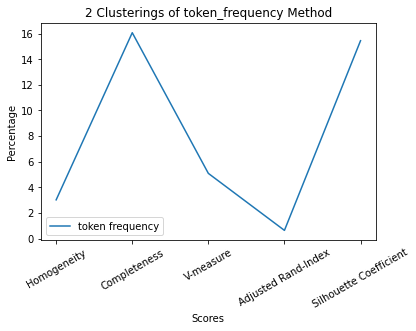

In [80]:
# visualize the 2 clusterings of token_frequency method
score_2_clusters_tf = score_clusters(score_tf_2_cluster_eval,title = "2 Clusterings of token_frequency Method")

In [81]:
# find the 2 clusterings of tf_idf method
cluster_2_tf_idf = clustering(X,2,'tf_idf')

In [82]:
# find the evaluation of 2 clusterings of tf_idf method
score_tf_idf_2_cluster_eval = clustering_evaluation(X,cluster_2_tf_idf['gold_categories'],cluster_2_tf_idf['predicted'],method = 'tf_idf')

Homogeneity: 0.109
Completeness: 0.307
V-measure: 0.161
Adjusted Rand-Index: 0.085
Silhouette Coefficient: 0.006


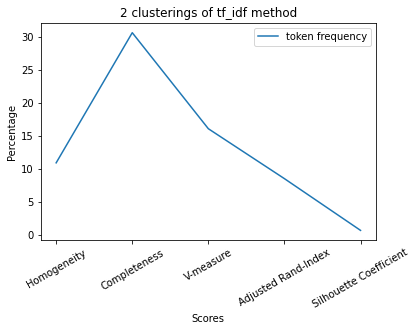

In [83]:

score_2_clusters_tf_idf = score_clusters(score_tf_idf_2_cluster_eval,title = "2 clusterings of tf_idf method")

+ compare 2 clusters of tf and tf_idf methods

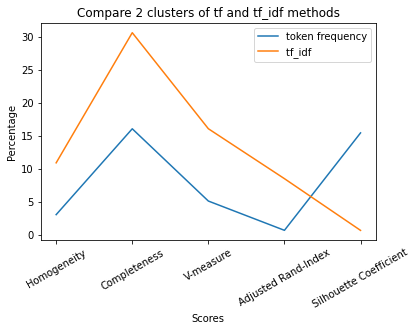

In [84]:
compare_score_2_clusters = compare_score_clusters(score_tf_2_cluster_eval,score_tf_idf_2_cluster_eval, title = "Compare 2 clusters of tf and tf_idf methods")

+ 6 clustering

In [86]:
# find the 6 clusterings of token_frequency method
cluster_6_tf = clustering(X,6,'token_frequency')

In [87]:
# find evaluation of 6 clusterings of token_frequency method
score_tf_6_cluster_eval = clustering_evaluation(X,cluster_6_tf['gold_categories'],cluster_6_tf['predicted'],method = 'token_frequency')

Homogeneity: 0.059
Completeness: 0.270
V-measure: 0.097
Adjusted Rand-Index: 0.006
Silhouette Coefficient: 0.134


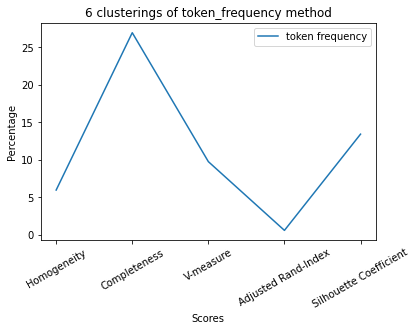

In [88]:
# visulaize the 6 clusterings of token_frequency method
score_tf_6_clusters = score_clusters(score_tf_6_cluster_eval, title = "6 clusterings of token_frequency method")

In [89]:
# find the 6 clusterings of tf_idf method
cluster_6_tf_idf = clustering(X,6,'tf_idf')

In [90]:
# find the evaluation of 6 clusterings of tf_idf method
score_tf_idf_6_cluster_eval = clustering_evaluation(X,cluster_6_tf_idf['gold_categories'],cluster_6_tf_idf['predicted'],method = 'tf_idf')

Homogeneity: 0.343
Completeness: 0.365
V-measure: 0.354
Adjusted Rand-Index: 0.254
Silhouette Coefficient: 0.011


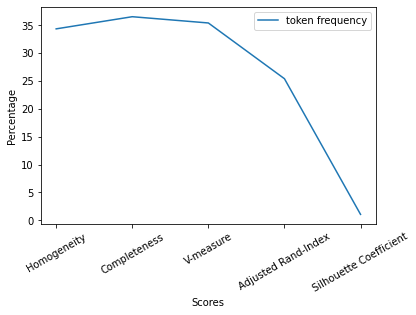

In [91]:
# visualize the 6 clusterings of tf_idf method
score_6_cluster_tf = score_clusters(score_tf_idf_6_cluster_eval)

++ Compare tf vs tf-idf of 6 clusterings

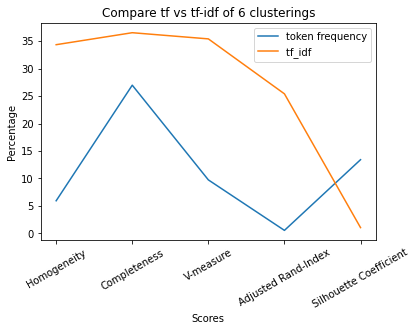

In [92]:
compare_score_6_clusters = compare_score_clusters(score_tf_6_cluster_eval,score_tf_idf_6_cluster_eval, title = "Compare tf vs tf-idf of 6 clusterings")



# Exercise 4 – Classifying (4 points)

Since you know which category and subcategory each person in your dataset belongs to, you can also learn a classifier and check how well
it can predict the category and subcategory a person in your dataset belongs to.

    Your code should include:

• a function which outputs accuracy, a confusion matrix, precision, recall and F1 for the results of your classification (when classifying into categories and when classifying into subcategories)

• a function which outputs a visualisation of the accuracy of your classifier per category and per subcategories

In [93]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

+ 2 Types (A&Z)

In [94]:
def classifier(X,Y):

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

    tfidf_vectorizer = TfidfVectorizer(max_features=8000, use_idf=True,stop_words='english', tokenizer=nltk.word_tokenize)
    tfidf_matrix_train = tfidf_vectorizer.fit_transform(X_train)
    tfidf_matrix_test = tfidf_vectorizer.transform(X_test)

    # Create a Perceptron object
    clf = Perceptron()

    # Train the model on the training data
    clf.fit(tfidf_matrix_train,Y_train)

    # Test the model on the test data
    prediction = clf.predict(tfidf_matrix_test)
    # Print out the expected values and the predictions
    accuracy = accuracy_score(Y_test,prediction)
    # Print out the expected values and the predictions
    print("expected values: {},predictions:{}".format(list(Y_test),list(prediction)))

    # Print accuracy
    print("accuracy:{}".format(accuracy))
    print(classification_report(Y_test,prediction))
    return (accuracy)



In [95]:
 
# 1 or 0
classes_2 = classifier(X,new_df['gold_type'])

expected values: [0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1],predictions:[0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1]
accuracy:0.9166666666666666
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.88      0.94      0.91        16

    accuracy                           0.92        36
   macro avg       0.91      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



+ 6 categories

In [96]:
#     Y = new_df['gold_categories']   
# 1,...,5
classes_6 = classifier(X,new_df['gold_categories'])

expected values: [5, 1, 2, 4, 2, 0, 0, 2, 0, 2, 1, 1, 0, 3, 0, 0, 2, 5, 2, 4, 5, 2, 4, 5, 0, 1, 5, 3, 5, 1, 4, 2, 5, 1, 5, 0],predictions:[5, 4, 4, 0, 2, 0, 0, 5, 0, 5, 3, 1, 0, 5, 0, 0, 2, 5, 2, 4, 5, 5, 4, 2, 0, 1, 5, 3, 5, 3, 4, 2, 2, 1, 2, 0]
accuracy:0.6666666666666666
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.50      0.67         6
           2       0.57      0.50      0.53         8
           3       0.33      0.50      0.40         2
           4       0.60      0.75      0.67         4
           5       0.56      0.62      0.59         8

    accuracy                           0.67        36
   macro avg       0.66      0.65      0.63        36
weighted avg       0.70      0.67      0.67        36



+ Accuracy Visualisation Function

In [97]:
def visual_2_kinds_accuracy(acc1,acc2, title = ""):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    x = ['Categories(2)', 'Sub Categories(6)']
    y = [acc1,acc2]
    ax.bar(x,y,width = 0.2)
    plt.title(title)
    plt.show()
    

++ Compare the accuray of Categories(2) and Sub Categories(6)

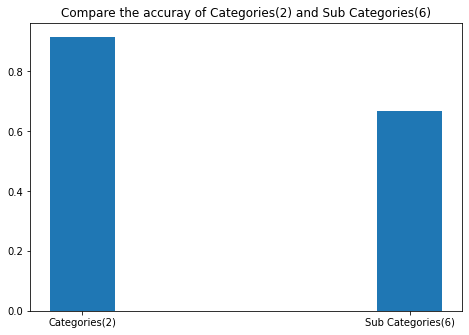

In [98]:
visual_2_kinds_accuracy(classes_2,classes_6,title = "Compare the accuray of Categories(2) and Sub Categories(6)")